# Initialization

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# for p-value out of significance test
from scipy.stats import ttest_ind

In [2]:
dataFolder = "./data"
p1 = { "testDir": dataFolder + "/p1_test.csv", "trainDir": dataFolder + "/p1_train.csv" }
p2 = { "testDir": dataFolder + "/p2_test.csv", "trainDir": dataFolder + "/p2_train.csv" }
p3 = { "testDir": dataFolder + "/p3_test.csv", "trainDir": dataFolder + "/p3_train.csv" }
p4 = {}
p5 = {}

p1["test"] = np.genfromtxt(p1["testDir"], delimiter=',')
p1["train"] = np.genfromtxt(p1["trainDir"], delimiter=',')
p2["test"] = np.genfromtxt(p2["testDir"], delimiter=',')
p2["train"] = np.genfromtxt(p2["trainDir"], delimiter=',')
p3["test"] = np.genfromtxt(p3["testDir"], delimiter=',')
p3["train"] = np.genfromtxt(p3["trainDir"], delimiter=',')

# Custom functions for P1 and P2

In [3]:
# Compute mean squared error
def mse(X, Y, W):
    return (1/2) * (X @ W - Y) @ (X @ W - Y)

# Compute mean absolute error
def mae(X, Y, W):
    return np.sum(np.abs(X @ W - Y))

# Normalize a vector
def normalize(v):
    min = v.min()
    max = v.max()
    return (v - min) / (max - min)

# Standardize a vector
def standardize(v):
    mean = np.mean(v)
    std = np.std(v)
    return (v - mean) / std

# Normalize and split the training data into features matrix with bias and the result vector
def parseData(data):
    m, n = data.shape
    data = np.array([normalize(col) for col in data.T]).T
    X = np.c_[np.ones(m), data.T[:-1].T]
    Y = data.T[-1].T
    return X, Y

# Print the required metrics
def printResult(x_train, y_train, x_test, y_test, func = lambda x : x):
    x_train = func(x_train)
    x_test = func(x_test)
    
    m, n = x_train.shape
    w = np.linalg.pinv(x_train) @ y_train

    mse_train = mse(x_train, y_train, w)
    mae_train = mae(x_train, y_train, w)
    p_train = ttest_ind(x_train @ w, y_train).pvalue
    mse_test = mse(x_test, y_test, w)
    mae_test = mae(x_test, y_test, w)
    p_test = ttest_ind(x_test @ w, y_test).pvalue
    
    print("MSE (train-split)     : ", mse_train)
    print("MAE (train-split)     : ", mae_train)
    print("p-value (train-split) : ", p_train)

    print("--------------------------------------")

    print("a) MSE     : ", mse_test)
    print("b) MAE     : ", mae_test)
    print("c) p-value : ", p_test)
    return [mse_train, mae_train, p_train], [mse_test, mae_test, p_test]

# P1 (Regression Analysis)

In this problem, the task is to predict the current health (as given by the target variable) of an organism given the measurements from two biological sensors measuring their bio-markers (negative indicates that it is lesser than the average case). 

With this data, you are expected to try our linear regression models on the  training data and report the following metrics on the test split: 
- Mean Squared Error, 
- Mean Absolute Error, 
- p-value out of significance test.

**DATA:** `p1train/test.csv`

In [4]:
p1["train"].shape

(10000, 3)

In [5]:
X, Y = parseData(p1["train"])
X_test, Y_test = parseData(p1["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0])

X, Y, W
# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

1476.0901088253356
5019.547076086856


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2$

In [6]:
p1["result"] = printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  1.6377431789576247
MAE (train-split)     :  144.16318383122172
p-value (train-split) :  0.9999999999998793
--------------------------------------
a) MSE     :  1.0198792104638341
b) MAE     :  81.01047477588321
c) p-value :  0.030717508773848688


# P2 (Regression Analysis)

Here, you are expected to predict the lifespan of the above organism given the data from three sensors. In this case, the model is not linear.

You are expected to try several (at least 3) non-linear regression models on the train split and report the following metrics on the test split.
- Mean Squared Error
- Mean Absolute Error
- p-value out of significance test

**DATA**: `p2train/test.csv`

In [7]:
p2["train"].shape, p2["test"].shape

((10000, 4), (5000, 4))

In [8]:
X, Y = parseData(p2["train"])
X_test, Y_test = parseData(p2["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0, 0])

# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

93.14053909693217
729.3773208010364


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$

In [9]:
p2["result"] = [[] for _ in range(8)]
p2["result"][0] = printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  64.04261865353428
MAE (train-split)     :  792.8424805196497
p-value (train-split) :  1.0
--------------------------------------
a) MSE     :  34.45351730675273
b) MAE     :  402.40621699350675
c) p-value :  0.04567218862928123


## Non-Linear regression (1)
$h_1(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$

In [10]:
def makeQuadratic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] for i in range(n) for j in range(n) if j <= i]).T

p2["result"][1] = printResult(X, Y, X_test, Y_test, makeQuadratic)

MSE (train-split)     :  15.025195918707364
MAE (train-split)     :  414.43543405251074
p-value (train-split) :  0.9999999999995892
--------------------------------------
a) MSE     :  8.293925461081386
b) MAE     :  214.73836188569697
c) p-value :  0.6539657025513983


## Non-Linear regression (2)
$h_2(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$
     $+ w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$
     $+ w_{10}x_1x_2x_3 + w_{11}x_1^2x_2 + w_{12}x_2^2x_1 + w_{13}x_2^2x_3 + w_{14}x_3^2x_2 + w_{15}x_3^2x_1 + w_{16}x_1^2x_3 + w_{17}x_1^3 + w_{18}x_2^3 + w_{19}x_3^3$

In [11]:
def makeCubic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] * data.T[k] for i in range(n) for j in range(n) for k in range(n) if j <= i and k <= j]).T

p2["result"][2] = printResult(X, Y, X_test, Y_test, makeCubic)

MSE (train-split)     :  14.015061295947277
MAE (train-split)     :  403.4520118357519
p-value (train-split) :  0.9999999999999714
--------------------------------------
a) MSE     :  7.792580568256314
b) MAE     :  210.3268643472337
c) p-value :  0.6337887955340187


## Non-Linear regression (3)
$h_3(x) = h_1(h_1(x))$

In [12]:
p2["result"][3] = printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeQuadratic(x)))

MSE (train-split)     :  0.8243996952040266
MAE (train-split)     :  97.24998340500956
p-value (train-split) :  0.9999999999995098
--------------------------------------
a) MSE     :  0.47367918630981265
b) MAE     :  48.4986710732787
c) p-value :  0.44918301185120135


## Non-Linear regression (4)
$h_4(x) = h_1(h_2(x))$

In [13]:
p2["result"][4] = printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeCubic(x)))

MSE (train-split)     :  0.016265667882183227
MAE (train-split)     :  10.770107850314911
p-value (train-split) :  0.999999999986867
--------------------------------------
a) MSE     :  0.03926868382605306
b) MAE     :  10.629900379280002
c) p-value :  0.42898862281953176


## Non-Linear regression (5)
$h_5(x) = h_2(h_2(x))$

In [14]:
p2["result"][5] = printResult(X, Y, X_test, Y_test, lambda x : makeCubic(makeCubic(x)))

MSE (train-split)     :  0.015762615029126598
MAE (train-split)     :  10.675718560412275
p-value (train-split) :  0.9999999999146658
--------------------------------------
a) MSE     :  0.03979982849860955
b) MAE     :  10.671505405575594
c) p-value :  0.4293311009552302


## Non-Linear regression (6)
$\phi(x) = \sum_{i=0, j=0, i \neq j}^n w_{ij} x_ie^{x_j} + \sum_{i=0}^n w_{ii} x_ie^{x_i}$

$h_6(x) = \phi(h_1(x))$

In [15]:
def makeExp(data):
    n = data.shape[1]
    return np.array([data.T[i] * np.exp(data.T[j]) for i in range(n) for j in range(n) if i != j] + [data.T[i] * np.exp(data.T[i]) for i in range(n)]).T

p2["result"][6] = printResult(X, Y, X_test, Y_test, lambda x : makeExp(makeQuadratic(x)))

MSE (train-split)     :  0.01657736594080365
MAE (train-split)     :  11.059370346143844
p-value (train-split) :  0.9999999644023003
--------------------------------------
a) MSE     :  0.03941869125570922
b) MAE     :  10.746865814541174
c) p-value :  0.4282532953053031


## Non-Linear regression (7)
$h_7(x) = \phi(h_2(x))$

In [16]:
p2["result"][7] = printResult(X, Y, X_test, Y_test, lambda x : makeExp(makeCubic(x)))

MSE (train-split)     :  0.015293426509348219
MAE (train-split)     :  10.688583380035912
p-value (train-split) :  0.9365993155260983
--------------------------------------
a) MSE     :  0.04209638251358401
b) MAE     :  11.098570146056602
c) p-value :  0.39757197242435915


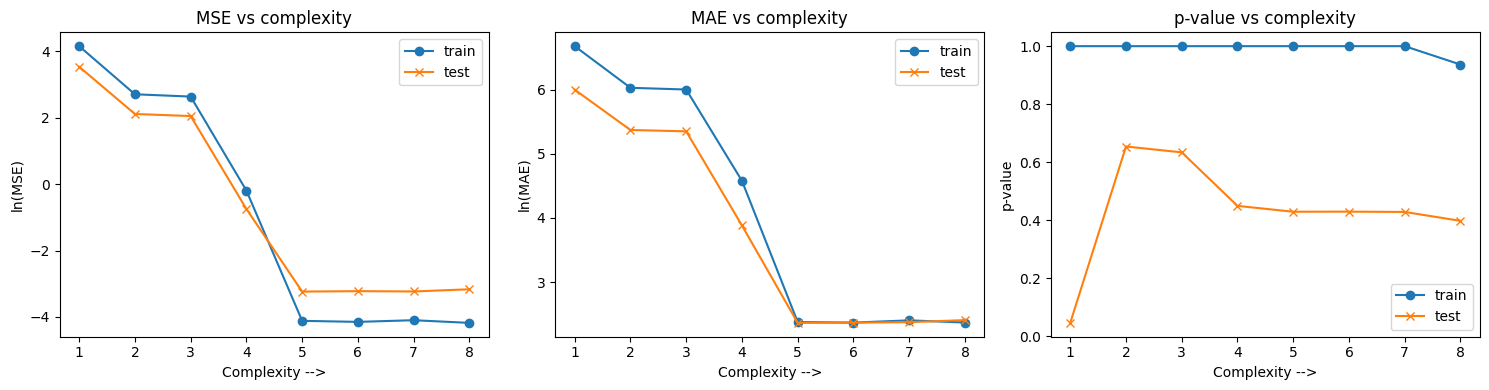

In [17]:
results = np.array(p2["result"])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot([i + 1 for i in range(8)], [np.log(row[0][0]) for row in results], label="train", marker='o')
ax[0].plot([i + 1 for i in range(8)], [np.log(row[1][0]) for row in results], label="test", marker='x')
ax[0].set_xlabel("Complexity -->")
ax[0].set_ylabel("ln(MSE)")
ax[0].legend()
ax[0].set_title("MSE vs complexity")

ax[1].plot([i + 1 for i in range(8)], [np.log(row[0][1]) for row in results], label="train", marker='o')
ax[1].plot([i + 1 for i in range(8)], [np.log(row[1][1]) for row in results], label="test", marker='x')
ax[1].set_xlabel("Complexity -->")
ax[1].set_ylabel("ln(MAE)")
ax[1].legend()
ax[1].set_title("MAE vs complexity")

ax[2].plot([i + 1 for i in range(8)], [(row[0][2]) for row in results], label="train", marker='o')
ax[2].plot([i + 1 for i in range(8)], [(row[1][2]) for row in results], label="test", marker='x')
ax[2].set_xlabel("Complexity -->")
ax[2].set_ylabel("p-value")
ax[2].legend()
ax[2].set_title("p-value vs complexity")

fig.tight_layout()

# Custom functions for P3, P4 and P5

In [ ]:
def normal(x, mean ,cov, *args):
    n = len(mean)
    try:
        val = np.exp(-0.5 * (x - mean) @ np.linalg.pinv(cov) @ (x - mean)) / ((2 * np.pi * np.linalg.det(cov)) ** (n/2) + 1e-8)
        return val
    except RuntimeError: # return a very small value when np.exp is overloaded
        return 1e-8

def logGMM(x, mean, cov, weights, *args):
    k = len(weights)
    val = np.log(np.sum([weights[i] * normal(x, mean[i], cov[i]) for i in range(k)]) + 1e-8)
    return val

def logNormal(x, mean, cov, *args):
    n = mean.shape[0]
    return - 0.5 * (n * np.log(2 * np.pi * np.linalg.det(cov)) + ((x - mean) @ np.linalg.inv(cov) @ (x - mean)))

# assume independent features
def logExp(x, mean, *args):
    return - np.log(np.abs(np.prod(mean))) - np.reciprocal(mean) @ x

def naiveLogNormal(x, u, v, *args):
    return -0.5 * np.sum([np.log(2 * np.pi * v[i][i]) + (x[i] - u[i]) * (x[i] - u[i])/v[i][i] for i in range(u.shape[0]) if v[i][i] > 0])

# X -> data, k -> number of normal densities
def em(X, k, max_iter = 100, random_seed=42):
    # m -> number of datapoints, n -> number of features
    m, n = X.shape
    
    # initialization
    np.random.seed(random_seed)
    weights = np.random.dirichlet(np.ones(k))
    means = [np.mean(X) + np.random.rand(n) for _ in range(k)]
    covs = [np.diag(np.random.rand(n) * 2 + 0.5) for _ in range(k)]
    
    for _ in range(max_iter):
        # Expectation step
        probs = np.array([[normal(x, means[i], covs[i]) * weights[i] for i in range(k)] for x in X])
        probs = (probs.T / np.sum(probs, axis=1)).T
        
        # Maximization step
        weights = np.sum(probs, axis=0) / m
        covs = [(X - means[i]).T @ np.diag(probs.T[i]) @ (X - means[i]) / np.sum(probs.T[i]) for i in range(k)]
        means = [np.average(X, weights=probs.T[i], axis=0) for i in range(k)]
        
    return weights, means, covs

def classify(x, classStats, density):
    label = -1
    max = -99999
    sum = 0
    prob = []
    for key in classStats:
        mean = classStats[key]["mean"]
        cov = classStats[key]["cov"]
        prior = classStats[key]["prior"]
        weights = classStats[key]["weights"] if "weights" in classStats[key] else []
        value = np.log(prior) + density(x, mean, cov, weights)
        prob.append(value)
        sum += value
        if value > max:
            max, label = value, key
    return np.r_[[label], (np.array(prob) / sum)]

# returns X, Y, X_test, Y_test and classStats
def trainTestSplit(data, train_ratio, func):
    n = data.shape[0]
    m = int(np.floor(data.shape[1] * train_ratio))
    classStats = {}
    x_train, y_train, x_test, y_test = [[[] for _ in range(n)] for _ in range(4)]
    for label in range(n):
        x_train[label], y_train[label], classStats[label] = func(label, data[label][:m], True)
        x_test[label], y_test[label] = func(label, data[label][m:])
    
    X, Y, X_test, Y_test = [x.reshape(-1, x.shape[-1]) for x in [np.array(x) for x in [x_train, y_train, x_test, y_test]]]
    return X, Y.flatten(), X_test, Y_test.flatten(), classStats

In [106]:
class metrics:
    def accuracy(predicted, actual):
        m = actual.size
        correctCount = sum([1 if int(predicted[i]) == int(actual[i]) else 0 for i in range(m)])
        return correctCount / m
    
    def confusionMatrix(predicted, actual, n = 5):
        cnf = np.zeros((n, n), dtype='uint')
        for i in range(actual.size):
            cnf[int(actual[i])][int(predicted[i])] += 1
        return cnf
    
    def f1Score(cnf):
        sum_predict = np.sum(cnf, axis=0)
        sum_actual  = np.sum(cnf, axis=1)
        f1 = np.zeros(cnf.shape[1])
        for i in range(f1.size):
            TP = cnf[i][i]
            FP, FN = sum_predict[i] - TP, sum_actual[i] - TP
            p, r = TP/(TP + FP + 1e-8), TP/(TP + FN + 1e-8)
            f1[i] = 2 * p * r / (p + r + 1e-8)
        return f1
    
    def roc(predict, actual, prob, ax, labels=[0, 1], thresolds=[0, 0.2, 0.4, 0.6, 0.8, 1]):
        for label in labels:
            tp, fp, tn, fn = [np.zeros(len(thresolds)) for _ in range(4)]
            for t in range(len(thresolds)):
                for i in range(actual.shape[0]):
                    if float(prob[i][label]) >= thresolds[t]:
                        if actual[i] == 0:
                            tp[t] += 1.0
                        else:
                            fp[t] += 1.0
                    else:
                        if actual[i] == 0:
                            fn[t] += 1.0
                        else:
                            tn[t] += 1.0
                        
            fpr = fp / (fp + tn + 1e-8)
            tpr = tp / (tp + fn + 1e-8)
            ax.plot(fpr, tpr, label=label, marker='x')        
        
        ax.set_xlabel("False positive rate")
        ax.set_ylabel("True positive rate")
        ax.legend()
        
    
    def print(X, Y, X_test, Y_test, classStats, density, result=True):
        n_labels = len(classStats)
        train = np.array([classify(x, classStats, density) for x in X])
        test = np.array([classify(x, classStats, density) for x in X_test])
        y_train, p_train = train.T[0], train.T[1:].T
        y_test, p_test = test.T[0], test.T[1:].T
                
        cnf_train = metrics.confusionMatrix(y_train, Y, n_labels)
        cnf_test = metrics.confusionMatrix(y_test, Y_test, n_labels)
        acc_train = metrics.accuracy(y_train, Y)
        acc_test = metrics.accuracy(y_test, Y_test)
        f1_train = metrics.f1Score(cnf_train)
        f1_test = metrics.f1Score(cnf_test)
        
        print("------------------ Train ---------------------")
        print("Classification Accuracy : ", acc_train)
        print("F1 Score                : ", f1_train)
        print("------------------ Test ----------------------")
        print("Classification Accuracy : ", acc_test)
        print("F1 Score                : ", f1_test)
        # print("Confusion Matrix        : ")
        # print(cnf_test)
        
        fig, ax = plt.subplots(2, 2, figsize=(16, 16))
        ax[0][0].matshow(cnf_train.T, cmap='GnBu')
        ax[0][0].set_xlabel("Predicted")
        ax[0][0].set_ylabel("Actual")
        ax[0][0].set_title("Confusion Matrix (train)")
        for (x, y), value in np.ndenumerate(cnf_train):
            ax[0][0].text(x, y, f"{value: d}", va="center", ha="center")
        
        ax[0][1].matshow(cnf_test.T, cmap='GnBu')
        ax[0][1].set_xlabel("Predicted")
        ax[0][1].set_ylabel("Actual")
        ax[0][1].set_title("Confusion Matrix (test)")
        for (x, y), value in np.ndenumerate(cnf_test):
            ax[0][1].text(x, y, f"{value: d}", va="center", ha="center")
        
        thresolds = [i/100 for i in range(100)]
        metrics.roc(y_train, Y, p_train, ax[1][0], thresolds=thresolds)
        metrics.roc(y_test, Y_test, p_test, ax[1][1], thresolds=thresolds)
        ax[1][0].set_title("ROC (train)")
        ax[1][1].set_title("ROC (test)")
        
        if result:
            return [acc_train, f1_train], [acc_test, f1_test]

# P3 (Multi-class classification)

We have data from 10 sensors fitted in an industrial plant. There are five classes indicating which product is being produced. The task is to predict the product being produced by looking at the observation from these 10 sensors. 

Given this, you are expected to implement 
- Bayes’ classifiers with 0-1 loss assuming Normal, exponential, and GMMs (with diagonal co-variances) as class-conditional densities. For GMMs, code up the EM algorithm,
- Linear classifier using the one-vs-rest approach
- Multi-class Logistic regressor with gradient descent.

The metrics to be computed are 
- Classification accuracy, 
- Confusion matrix,
- Class-wise F1 score, 
- RoC curves for any pair of classes, and 
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters, 
- Emipiral risk on the train and test data while using logistic regressor.

**DATA:** `p3train/test.csv`

## Data Handling

In [20]:
p3["train"].shape, p3["test"].shape

((60000, 11), (15000, 11))

In [21]:
classStats = {}
for row in p3["train"]:
    label = int(row[-1]) - 1
    if label in classStats:
        classStats[label].append(row[:-1])
    else:
        classStats[label] = [row[:-1]]

# classStats = [np.array(data) for data in classStats]
for i in range(len(classStats)):
    data = np.array(classStats[i])
    classStats[i] = { "mean": np.mean(data, axis=0), "cov": np.cov(data.T), "prior": data.shape[0], "data": data }

In [73]:
def splitData(data):
    # X = np.array([normalize(col) for col in data.T[:-1]]).T
    X = data.T[:-1].T
    Y = data.T[-1].T.astype("int") - 1
    return X, Y

X, Y = splitData(p3["train"])
X_test, Y_test = splitData(p3["test"])

X.shape, Y.shape, X_test.shape, Y_test.shape

((60000, 10), (60000,), (15000, 10), (15000,))

## Bayes' classifier with normal distribution

------------------ Train ---------------------
Classification Accuracy :  0.5906666666666667
F1 Score                :  [0.55688598 0.57825972 0.64442454 0.60400323 0.57840442]
------------------ Test ----------------------
Classification Accuracy :  0.5884
F1 Score                :  [0.54269882 0.57421581 0.64145558 0.597958   0.59275452]
Confusion Matrix        : 
[[1665  476  202  205  423]
 [ 385 1913  189  152  342]
 [ 350  407 1798  130  355]
 [ 378  486  206 1552  353]
 [ 387  400  171  177 1898]]


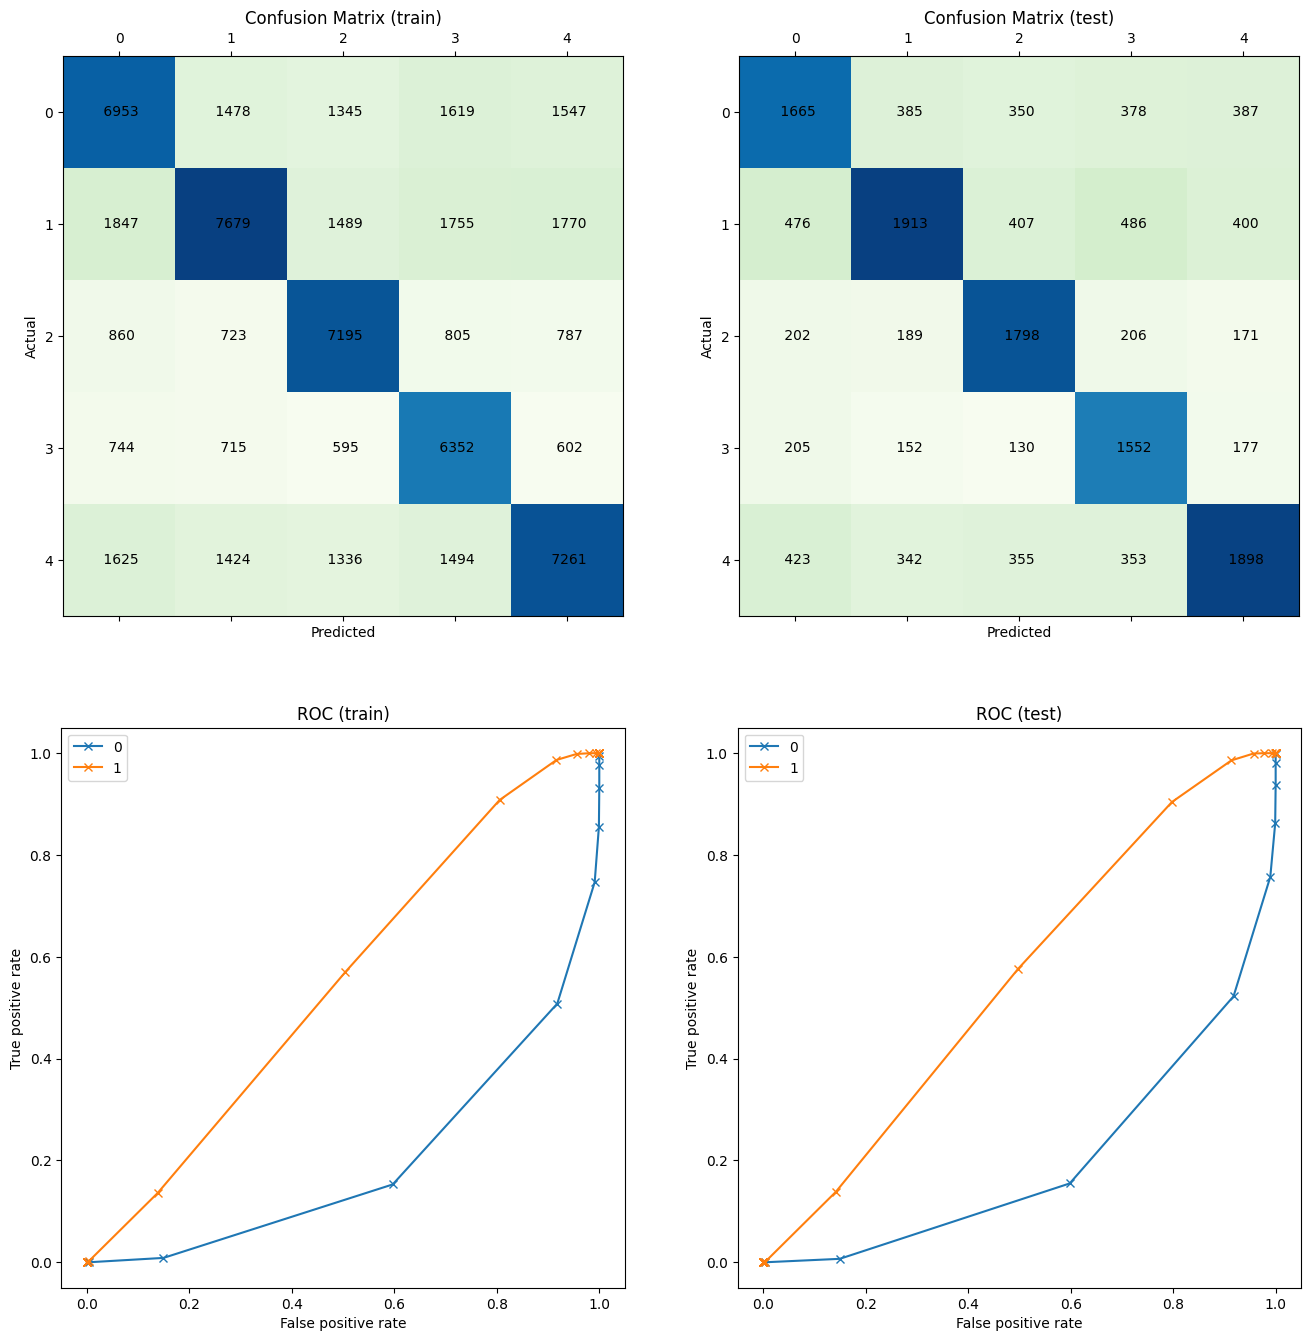

In [23]:
p3["result"] = [[] for _ in range(5)]
p3["result"][0] = metrics.print(X, Y, X_test, Y_test, classStats, logNormal)

## Bayes' classifier with exponential distribution

------------------ Train ---------------------
Classification Accuracy :  0.20075
F1 Score                :  [0.28484541 0.05314039 0.22726558 0.01323236 0.24428515]
------------------ Test ----------------------
Classification Accuracy :  0.20113333333333333
F1 Score                :  [0.27855224 0.05824259 0.22509225 0.01099256 0.25139106]
Confusion Matrix        : 
[[1089  133  915   34  800]
 [1008  115 1244   14  600]
 [ 728  405  915   45  947]
 [ 953  175 1082   17  748]
 [1070  140  934    8  881]]


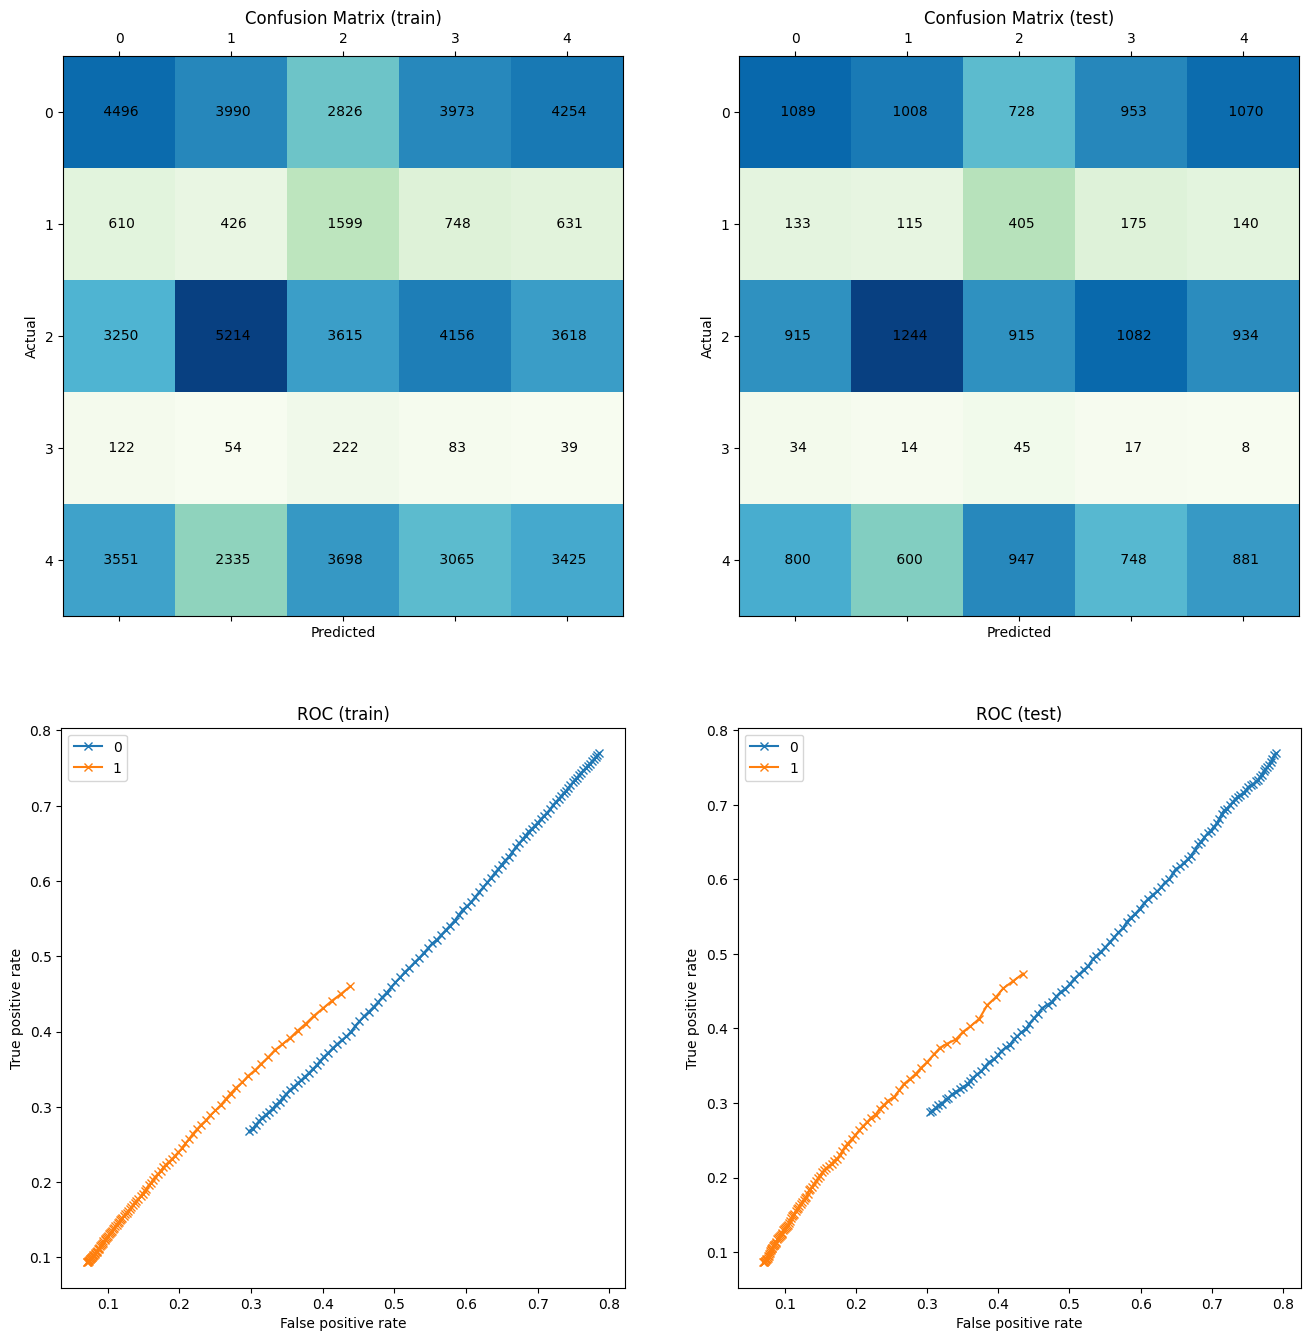

In [24]:
p3["result"][1] = metrics.print(X, Y, X_test, Y_test, classStats, logExp)

## Bayes' classifier with GMM distribution

In [107]:
def printGmmP3(number_of_guassians = 2, max_iter = 50):
    classStatsGMM = {}
    for label in classStats:
        classStatsGMM[label] = { "prior": classStats[label]["prior"] }
        classStatsGMM[label]["weights"], classStatsGMM[label]["mean"], classStatsGMM[label]["cov"] = em(classStats[label]["data"], number_of_guassians, max_iter)

    metrics.print(X, Y, X_test, Y_test, classStatsGMM, logGMM, result=False)

/tmp/ipykernel_1895175/2518163037.py:4: RuntimeWarning: overflow encountered in exp
  val = np.exp(-0.5 * (x - mean) @ np.linalg.pinv(cov) @ (x - mean)) / ((2 * np.pi * np.linalg.det(cov)) ** (n/2) + 1e-8)
/tmp/ipykernel_1895175/2518163037.py:38: RuntimeWarning: invalid value encountered in divide
  probs = (probs.T / np.sum(probs, axis=1)).T


------------------ Train ---------------------
Classification Accuracy :  0.2947166666666667
F1 Score                :  [0.35729416 0.38113588 0.         0.38679298 0.        ]
------------------ Test ----------------------
Classification Accuracy :  0.29013333333333335
F1 Score                :  [0.35368688 0.37694588 0.         0.38042474 0.        ]


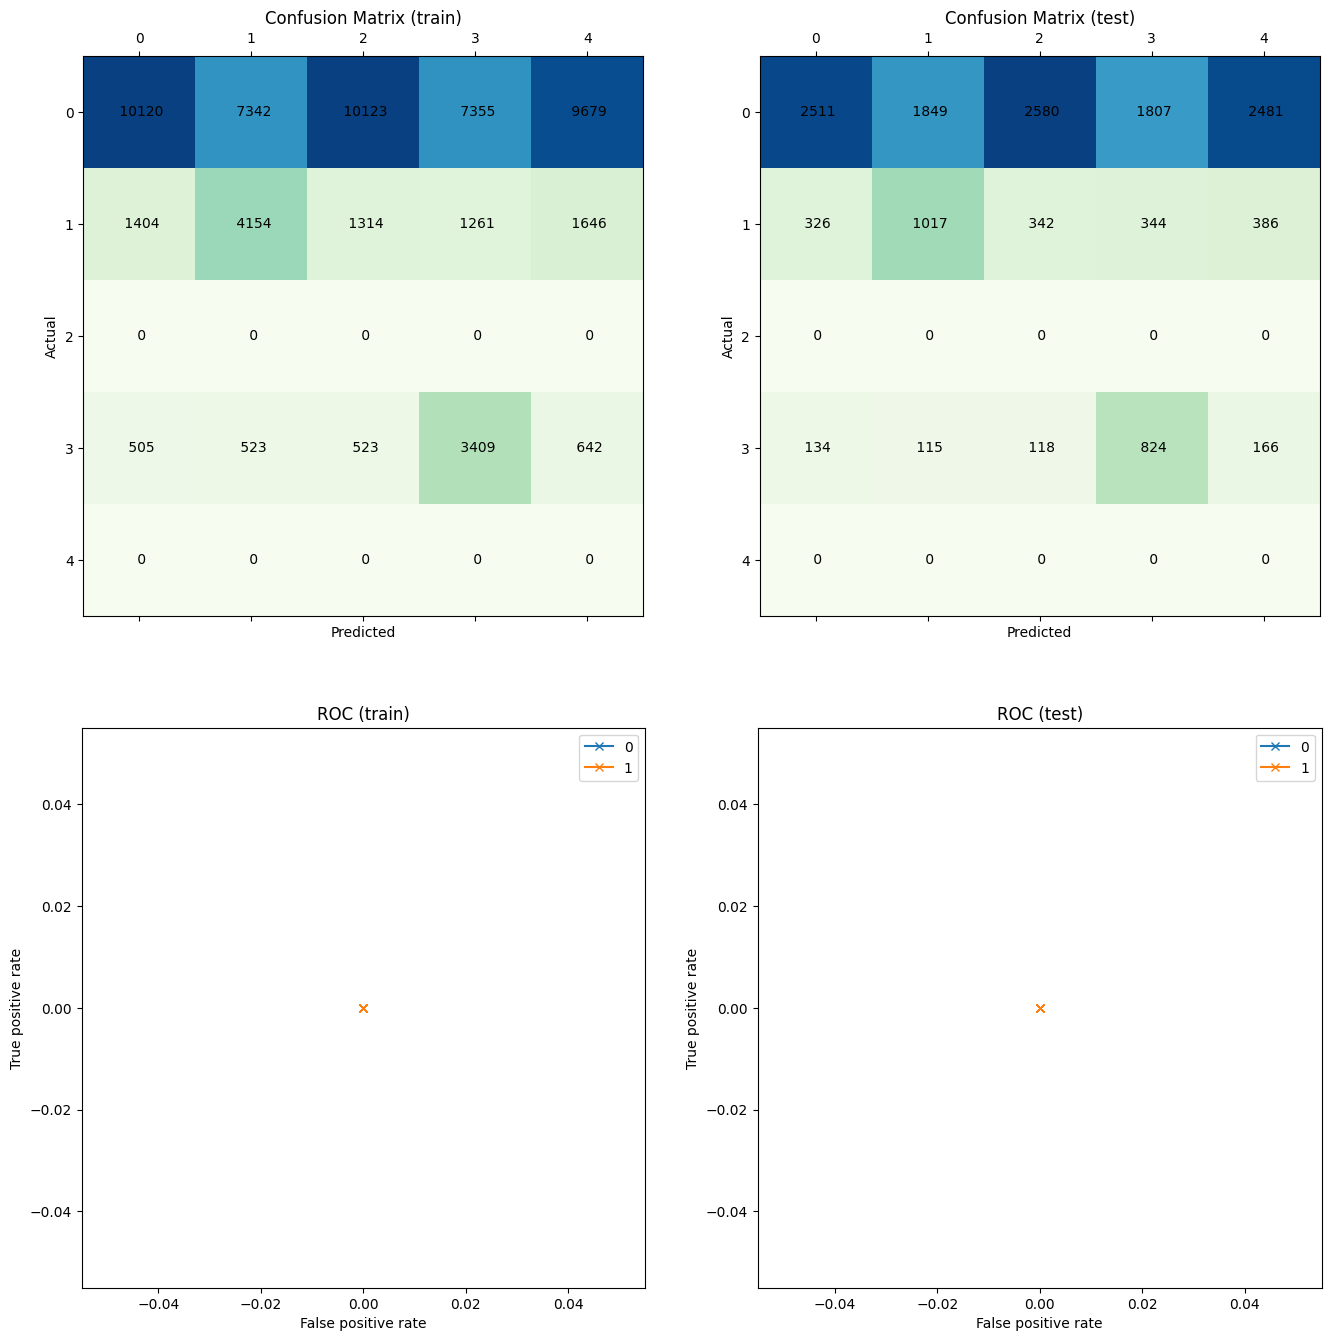

In [108]:
printGmmP3(2)

In [ ]:
printGmmP3(5)

/tmp/ipykernel_1895175/2518163037.py:4: RuntimeWarning: overflow encountered in exp
  val = np.exp(-0.5 * (x - mean) @ np.linalg.pinv(cov) @ (x - mean)) / ((2 * np.pi * np.linalg.det(cov)) ** (n/2) + 1e-8)
/tmp/ipykernel_1895175/2518163037.py:38: RuntimeWarning: invalid value encountered in divide
  probs = (probs.T / np.sum(probs, axis=1)).T


In [ ]:
printGmmP3(8)

## Logistic Regression

Test accuracy: 0.573
Training empirical risk: 1.1430560810433503
Training error rate: 0.42951666666666666
Test empirical risk: 1.1405925143545994
Test error rate: 0.42700000000000005
Class-wise F1 score:
[0.51773533 0.56108447 0.62388059 0.58178158 0.57906824]


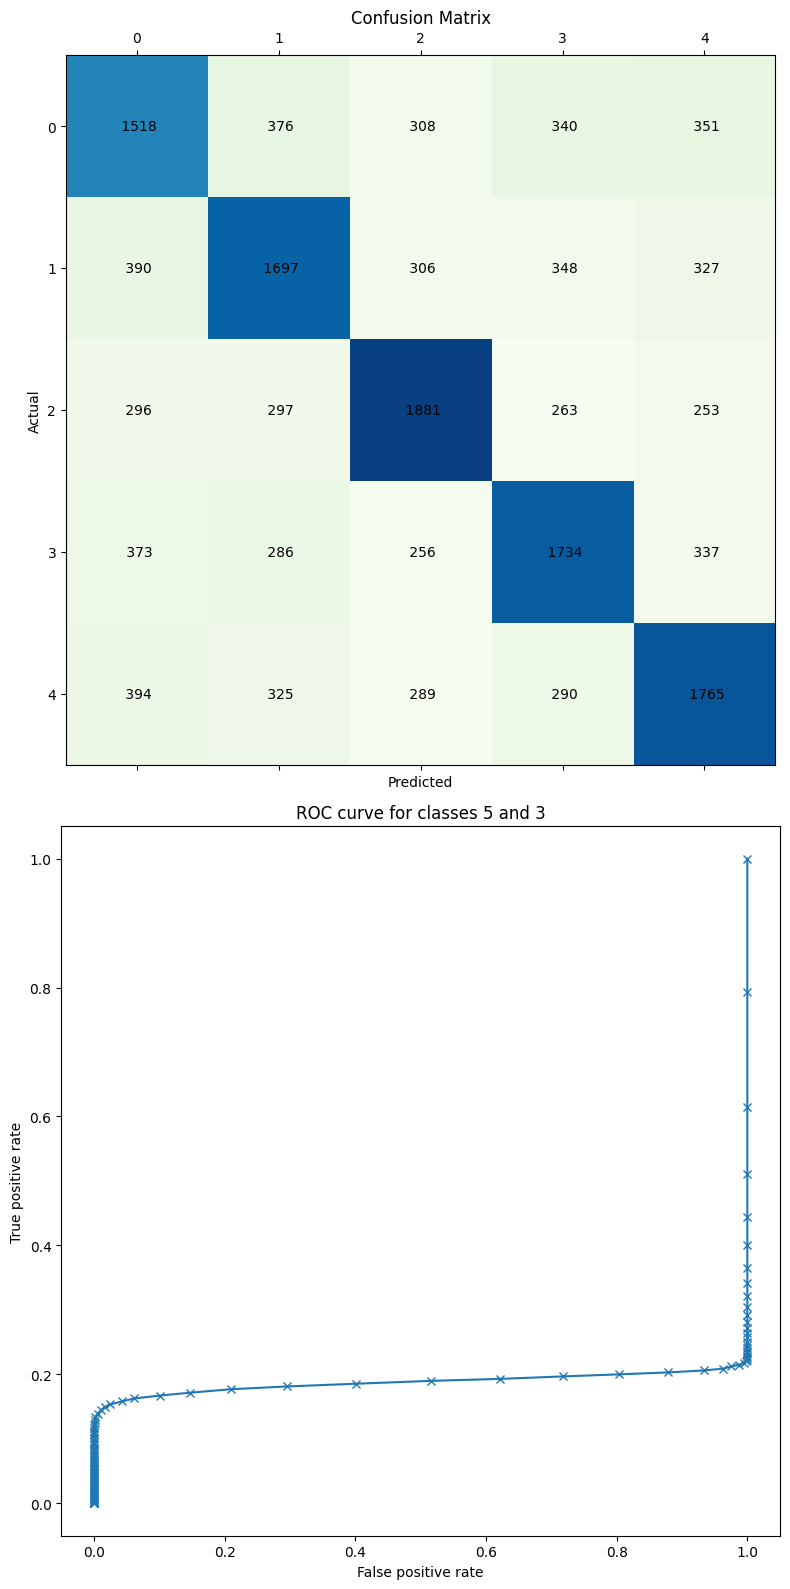

In [26]:
train_data = p3["train"]
test_data = p3["test"]

# Split data into features and labels
X_train = train_data[:, :-1]
y_train_orig = train_data[:, -1]
X_test = test_data[:, :-1]
y_test_orig = test_data[:, -1]

# One-hot encode target variable
num_classes = 5
num_samples = y_train_orig.shape[0]
y_train = np.zeros((num_samples, num_classes))
for i in range(num_samples):
    y_train[i, int(y_train_orig[i]) - 1] = 1


# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Define softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


# Initialize weights and biases
num_features = X_train.shape[1]
W = np.random.randn(num_features, num_classes)
b = np.random.randn(num_classes)

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000
epsilon = 1e-8

# Train model using gradient descent
prev_loss = float('inf')
for i in range(num_iterations):
    # Forward propagation
    z = np.dot(X_train, W) + b
    y_pred = softmax(z)

    # Compute loss
    loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

    # Backward propagation
    dz = y_pred - y_train
    dW = np.dot(X_train.T, dz) / num_samples
    db = np.sum(dz, axis=0) / num_samples

    # Update weights and biases
    W -= learning_rate * dW
    b -= learning_rate * db

    # Check stopping criterion
    if prev_loss - loss < epsilon:
        print('Stopping criterion met')
        break

    prev_loss = loss

# Evaluate model on test set
z = np.dot(X_test, W) + b
y_pred = np.argmax(softmax(z), axis=1) + 1
accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
print('Test accuracy:', accuracy)


z_train = np.dot(X_train, W) + b
y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
print('Training empirical risk:', train_loss)
print('Training error rate:', train_error_rate)

# Compute empirical risk on test data
num_samples_test = y_test_orig.shape[0]
y_test = np.zeros((num_samples_test, num_classes))
for i in range(num_samples_test):
    y_test[i, int(y_test_orig[i]) - 1] = 1

z_test = np.dot(X_test, W) + b
test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
print('Test empirical risk:', test_loss)
print('Test error rate:', test_error_rate)



num_classes = len(np.unique(y_test_orig))
confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(y_test_orig)):
    true_class = int(y_test_orig[i] - 1)
    predicted_class = int(y_pred[i] - 1)
    confusion_matrix[true_class, predicted_class] += 1
# print('Confusion matrix:')
# print(confusion_matrix)


num_classes = len(np.unique(y_test_orig))
f1_scores = np.zeros(num_classes)
for i in range(num_classes):
    true_positives = confusion_matrix[i, i]
    false_positives = np.sum(confusion_matrix[:, i]) - true_positives
    false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
print('Class-wise F1 score:')
print(f1_scores)

from matplotlib import pyplot as plt

# Choose two classes
class_1 = 5
class_2 = 3

# Get predicted probabilities for the two classes
y_class_1 = y_pred == class_1
y_class_2 = y_pred == class_2
y_prob_1 = softmax(z)[:, class_1 - 1]
y_prob_2 = softmax(z)[:, class_2 - 1]

# Compute true positive rate and false positive rate
num_thresholds = 100
tpr = np.zeros(num_thresholds)
fpr = np.zeros(num_thresholds)
for i in range(num_thresholds):
    threshold = i / (num_thresholds - 1)
    tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
    fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
    tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
    fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
    tpr[i] = tp / (tp + fn + 1e-8)
    fpr[i] = fp / (fp + tn + 1e-8)

# Plot RoC curve and confusion matrix
fig, ax = plt.subplots(2, 1, figsize=(8, 16))
ax[0].matshow(confusion_matrix, cmap='GnBu')
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Confusion Matrix")
for (x, y), value in np.ndenumerate(confusion_matrix):
    ax[0].text(x, y, f"{value: .0f}", va="center", ha="center")

ax[1].plot(fpr, tpr, marker='x')
ax[1].set_xlabel("False positive rate")
ax[1].set_ylabel("True positive rate")                     
ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))

fig.tight_layout()

## Linear classifier using one vs all approach

Test accuracy: 0.5189333333333334
Confusion matrix:
[[1259.  611.  359.  479.  263.]
 [ 365. 1526.  340.  391.  359.]
 [ 330.  422. 1804.  257.  227.]
 [ 297.  477.  303. 1658.  240.]
 [ 468.  345.  269.  414. 1537.]]
Class-wise F1 score: [0.44253075072002684, 0.47972335245302616, 0.5900245248428785, 0.537091021891787, 0.5432055083655231]


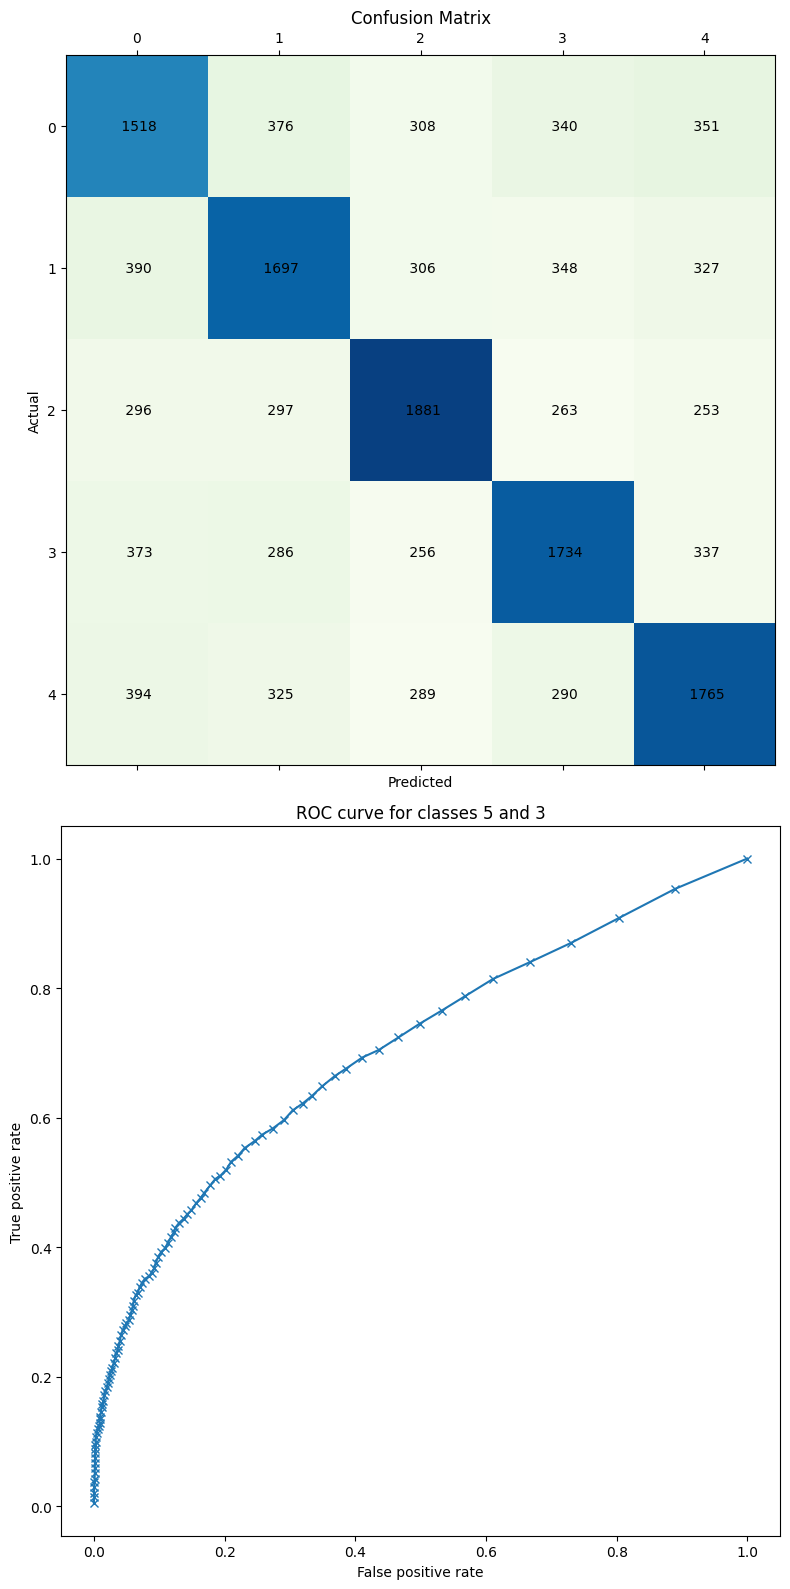

In [27]:
data = p3["train"]
X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

# One-hot encode target variable
num_classes = 5
num_samples = y.shape[0]
y_encoded = np.zeros((num_samples, num_classes))
for i in range(num_samples):
    y_encoded[i, int(y[i]) - 1] = 1

# Add a column of 1s to X for bias term
X = np.hstack((X, np.ones((num_samples, 1))))

# Initialize weights
num_features = X.shape[1]
W = np.random.randn(num_features, num_classes)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000
epsilon = 1e-8

# Train model using gradient descent
prev_loss = float('inf')
for i in range(num_iterations):
    # Forward propagation
    z = np.dot(X, W)
    y_pred = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    # Compute loss
    loss = -np.sum(y_encoded * np.log(y_pred + epsilon)) / num_samples

    # Backward propagation
    dz = y_pred - y_encoded
    dW = np.dot(X.T, dz) / num_samples

    # Update weights
    W -= learning_rate * dW

    # Check stopping criterion
    if prev_loss - loss < epsilon:
        print('Stopping criterion met')
        break

    prev_loss = loss

# Evaluate model on test set
X_test = test_data[:, :-1]
y_test_orig = test_data[:, -1]
num_test_samples = y_test_orig.shape[0]

# One-hot encode target variable
y_test = np.zeros((num_test_samples, num_classes))
for i in range(num_test_samples):
    y_test[i, int(y_test_orig[i]) - 1] = 1

# Add a column of 1s to X_test for bias term
X_test = np.hstack((X_test, np.ones((num_test_samples, 1))))

# Compute predictions on test set
z_test = np.dot(X_test, W)
y_test_pred = np.argmax(z_test, axis=1) + 1

# Compute test accuracy
test_accuracy = np.sum(y_test_pred == y_test_orig) / num_test_samples
print('Test accuracy:', test_accuracy)

conf_matrix = np.zeros((num_classes, num_classes))
for i in range(num_test_samples):
    true_class = int(y_test_orig[i]) - 1
    pred_class = int(y_test_pred[i]) - 1
    conf_matrix[true_class, pred_class] += 1
print('Confusion matrix:')
print(conf_matrix)

# Compute class-wise F1 score
f1_scores = []
for c in range(num_classes):
    tp = conf_matrix[c,c]
    fp = np.sum(conf_matrix[:,c]) - tp
    fn = np.sum(conf_matrix[c,:]) - tp
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    f1 = 2 * precision * recall / (precision + recall + epsilon)
    f1_scores.append(f1)
print('Class-wise F1 score:', f1_scores)

# Compute predictions on test set
z_test = np.dot(X_test, W)
y_test_prob = np.exp(z_test) / np.sum(np.exp(z_test), axis=1, keepdims=True)
y_test_pred = np.argmax(z_test, axis=1) + 1

# Choose two classes for ROC curve
class1 = 1
class2 = 2

# Compute false positive rate and true positive rate for different thresholds
fpr = []
tpr = []
num_thresholds = 100
for i in range(num_thresholds):
    threshold = i / num_thresholds
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(num_test_samples):
        if y_test_orig[j] == class1:
            if y_test_prob[j][class1-1] >= threshold:
                tp += 1
            else:
                fn += 1
        elif y_test_orig[j] == class2:
            if y_test_prob[j][class1-1] >= threshold:
                fp += 1
            else:
                tn += 1
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

# Plot RoC curve and confusion matrix
fig, ax = plt.subplots(2, 1, figsize=(8, 16))
ax[0].matshow(confusion_matrix, cmap='GnBu')
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Confusion Matrix")
for (x, y), value in np.ndenumerate(confusion_matrix):
    ax[0].text(x, y, f"{value: .0f}", va="center", ha="center")

ax[1].plot(fpr, tpr, marker='x')
ax[1].set_xlabel("False positive rate")
ax[1].set_ylabel("True positive rate")                     
ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))

fig.tight_layout()

# P4 (Multi-class classification)

In this problem, we consider an image dataset called Kannada-MNIST. This dataset contains images (60,000 images with 6000 per class) of digits from the south Indian language of Kannada. The task is to build a 10-class classifier for the digits. 

You are supposed to test the following classification schemes: 
- Naive Bayes’ with Normal as Class conditional
- Logistic regressor with gradient descent
- Multi-class Bayes’ classifier with GMMs with diagonal co-variances for class conditionals.

Report the following metrics on the test data: 
- Classification accuracy
- Confusion matrix
- Class-wise F1 score
- RoC curves for any pair of classes
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters
- Emipiral risk on the train and test data while using logistic regressor

In this problem, first split the data into train and test parts with the following ratios of **20:80**, **30:70**, **50:50**, **70:30**, and **90:10**, and record your observations. Train the algorithms on the train part and evaluate over the test part.

**DATA:** `images.zip`

## Data handling

In [28]:
%%capture
!unzip -n data/images.zip -d data

In [29]:
import os
from os.path import join
from PIL import Image

imageDir = "./data/images"

labels = os.listdir(imageDir)
data = [[] for _ in labels]
for label in labels:
    # label = "0"
    dir = join(imageDir, label)
    files = os.listdir(dir)
    data[int(label)] = np.array([np.array(Image.open(join(dir, file)).convert("L").resize((8, 8)), dtype='uint8') for file in files])

p4["data"] = np.array(data)
p4["data"].shape

(10, 6000, 8, 8)

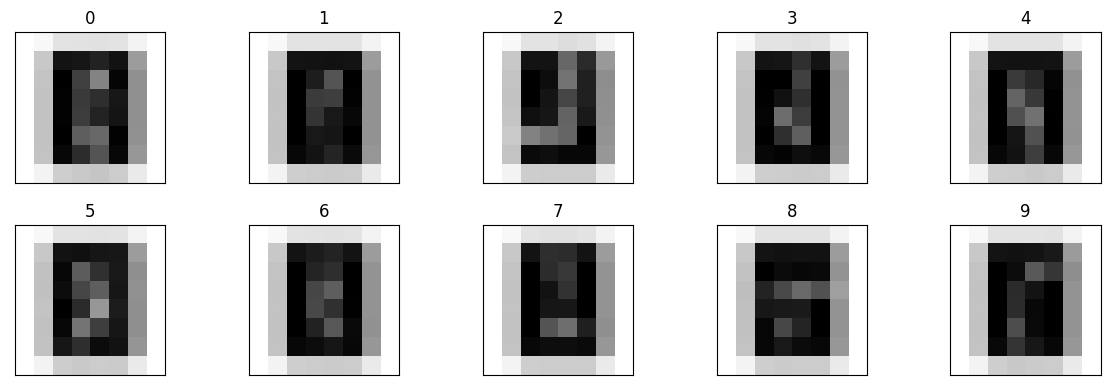

In [30]:
fig, ax = plt.subplots(2, 5, figsize=(12, 4))
for i in range(p4["data"].shape[0]):
    ax[i // 5][i % 5].imshow(p4["data"][i][0].astype(np.uint8), cmap='gray')
    ax[i // 5][i % 5].set_title(str(i))
    ax[i // 5][i % 5].get_xaxis().set_visible(False)
    ax[i // 5][i % 5].get_yaxis().set_visible(False)

fig.tight_layout()

In [31]:
def imgToFeatures(label, data, stats=False):
    X = np.array([x.flatten() for x in data]) / 255
    Y = label * np.ones(data.shape[0])
    if stats:
        return X, Y, { "mean": np.mean(X, axis=0), "cov": np.cov(X.T), "prior": data.shape[0] }
    return X, Y

p4["splitData"] = [trainTestSplit(p4["data"], r, imgToFeatures) for r in [0.2, 0.3, 0.5, 0.7, 0.9]]

## Naive Bayes

In [32]:
p4["result"] = [[] for _ in range(5)]

### Test split -- 20:80

------------------ Train ---------------------
Classification Accuracy :  0.53425
F1 Score                :  [0.38680659 0.51333728 0.94897549 0.08372828 0.42997097 0.45335003
 0.65400593 0.24928367 0.71159874 0.68919562]
------------------ Test ----------------------
Classification Accuracy :  0.5366041666666667
F1 Score                :  [0.40141676 0.50253807 0.9576004  0.08965788 0.43509903 0.439779
 0.64502833 0.25859015 0.72446863 0.69340974]
Confusion Matrix        : 
[[2210   50   35    0 2448   21    2    1   31    2]
 [1181 1683    6    0 1882   26   16    3    0    3]
 [  39   15 4709    0   10    8    1    0   16    2]
 [ 399   22   36  228 2517   12 1536   49    1    0]
 [  35    4    1    0 4723   20    6    0    7    4]
 [1194   92  173    5 1799 1393   58    1   12   73]
 [  43    8   12   10  269    3 4382   60    8    5]
 [ 491   22    2   42  732   12 2760  730    2    7]
 [ 577    1   51    0  762   30    8    0 2795  576]
 [  42    1   10    1 1768   10   18    2  

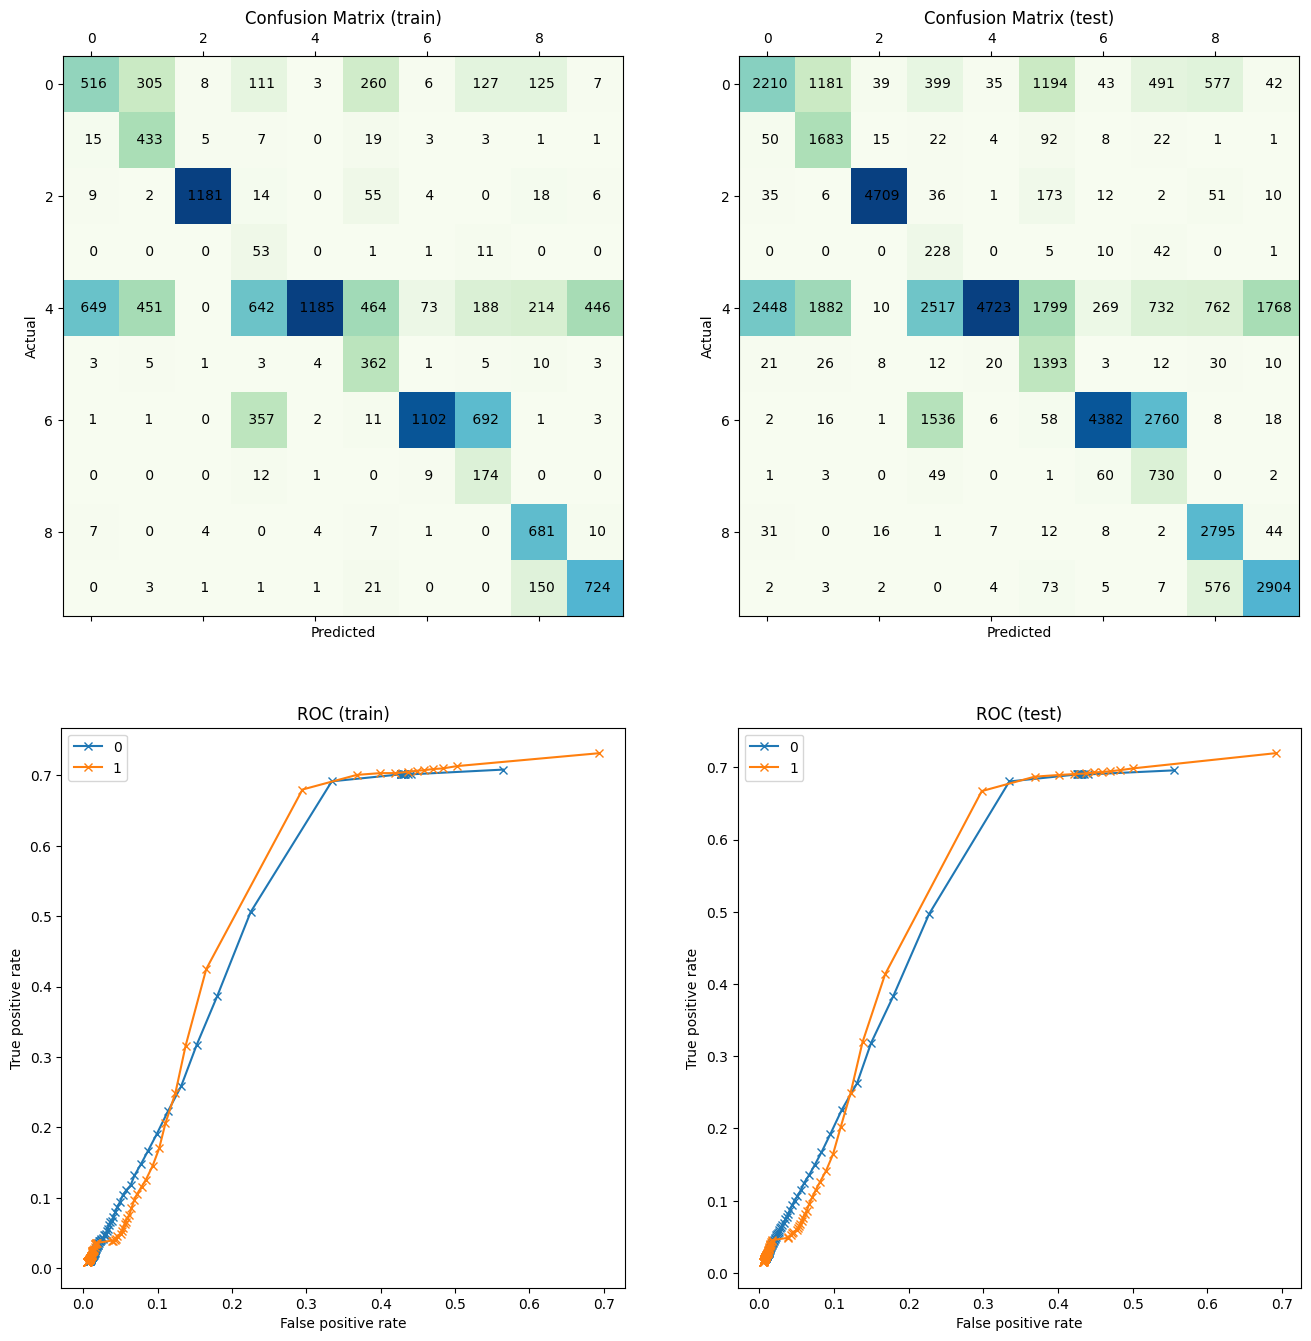

In [33]:
p4["result"][0] = metrics.print(*p4["splitData"][0], naiveLogNormal)

### Test split -- 30:70

------------------ Train ---------------------
Classification Accuracy :  0.5618333333333333
F1 Score                :  [0.46378879 0.6814188  0.92752867 0.16456921 0.42314561 0.53967007
 0.62488376 0.12118073 0.78088426 0.6947805 ]
------------------ Test ----------------------
Classification Accuracy :  0.5633095238095238
F1 Score                :  [0.48451459 0.67337807 0.92785818 0.15164104 0.42580977 0.53844859
 0.62368863 0.14554196 0.78687173 0.68726563]
Confusion Matrix        : 
[[1627  107   54    0 2339   23   10    1   39    0]
 [  52 2408    8    1 1659   28   41    2    0    1]
 [  14   20 4135    0   10    5    1    0   15    0]
 [  75   25   56  365 2211   14 1440   14    0    0]
 [   9    8    4    1 4141   21    6    0   10    0]
 [ 266  346  305    4 1595 1600   65    0   14    5]
 [   8    7   12   21  222    3 3894   25    7    1]
 [ 140   25    2  222  658   19 2799  333    2    0]
 [ 300    5  101    0  723   25   12    0 2865  169]
 [  25    1   36    0 1692    

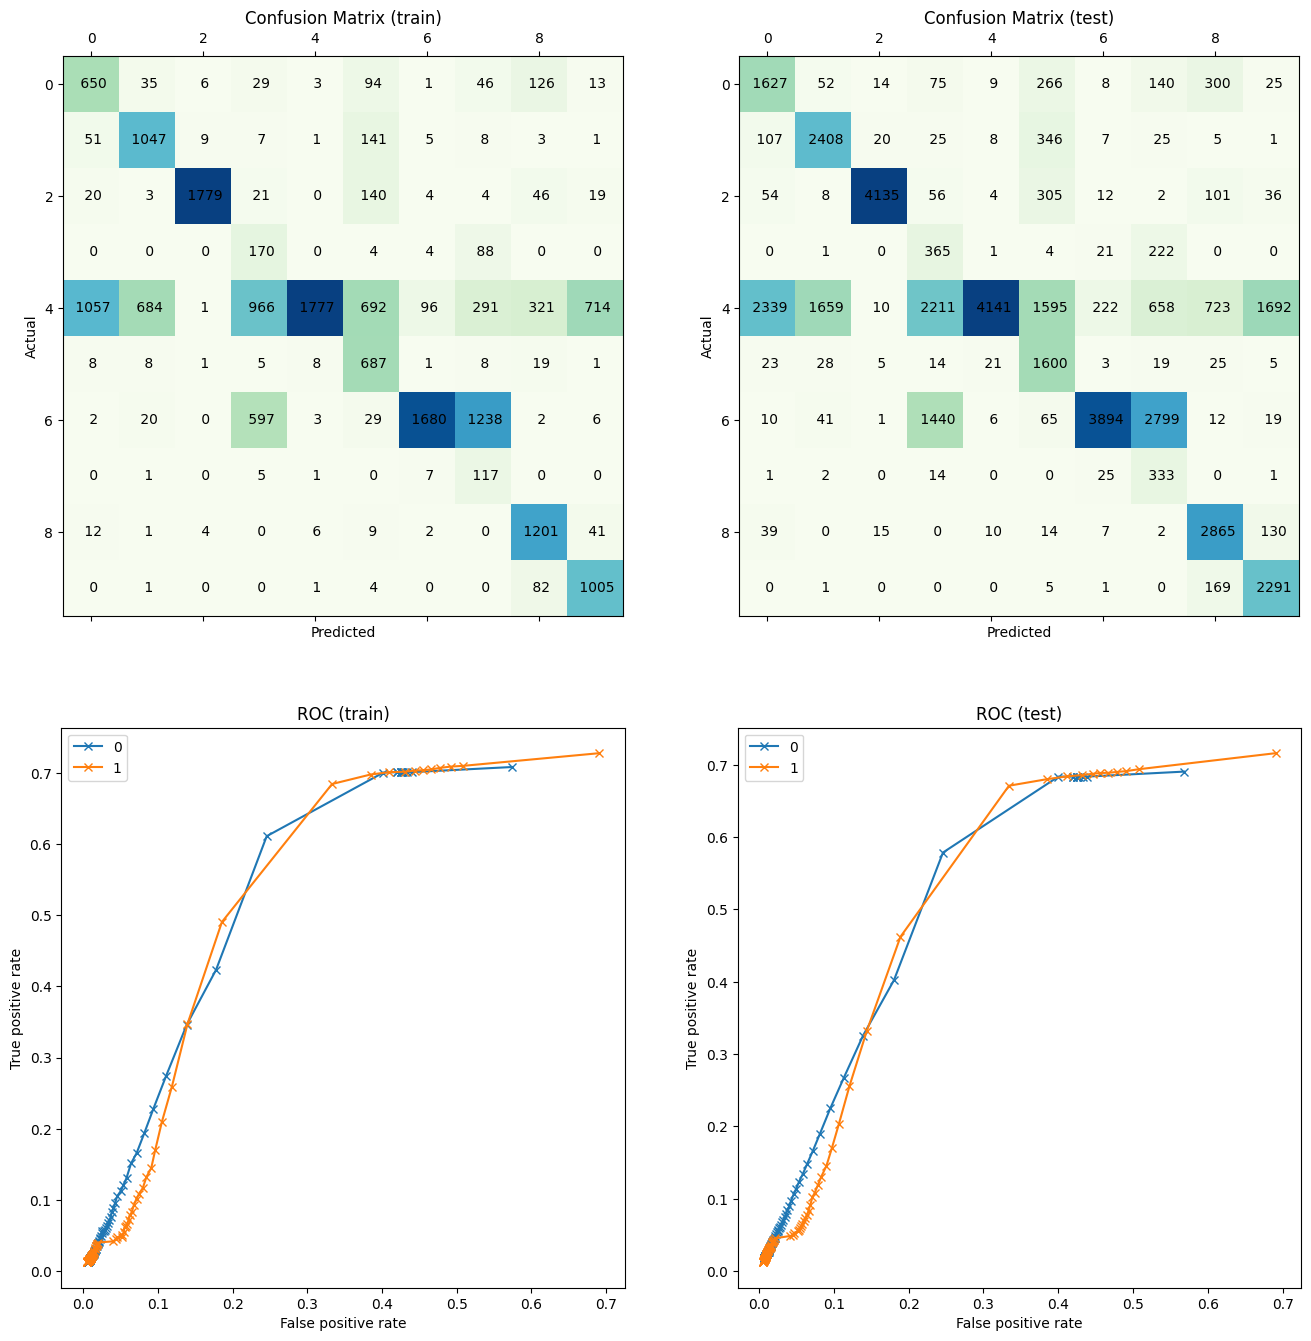

In [34]:
p4["result"][0] = metrics.print(*p4["splitData"][1], naiveLogNormal)

### Test split -- 50:50

------------------ Train ---------------------
Classification Accuracy :  0.5908666666666667
F1 Score                :  [0.50102135 0.68863261 0.95404381 0.42534761 0.44746431 0.41720319
 0.69147869 0.19567151 0.77107061 0.71343164]
------------------ Test ----------------------
Classification Accuracy :  0.5916666666666667
F1 Score                :  [0.52039329 0.67243601 0.9534537  0.40975609 0.44979367 0.40944473
 0.69336982 0.20894644 0.77740616 0.71101286]
Confusion Matrix        : 
[[1429   81   22    0 1421    4    3    1   39    0]
 [  50 1826    1    1 1104   13    2    1    1    1]
 [  11   85 2878    1    7    3    0    0   15    0]
 [  83   38   10  882 1466    7  496   17    0    1]
 [  14   10    0    2 2943   11    4    0   14    2]
 [ 492  356   92   10 1080  789   34    0  110   37]
 [   9    6    9   28  130    0 2787   23    6    2]
 [ 160   23    0  379  386    5 1686  355    6    0]
 [ 221    6   15    0  473   18   11    0 2092  164]
 [  23    0   10    2 1076    

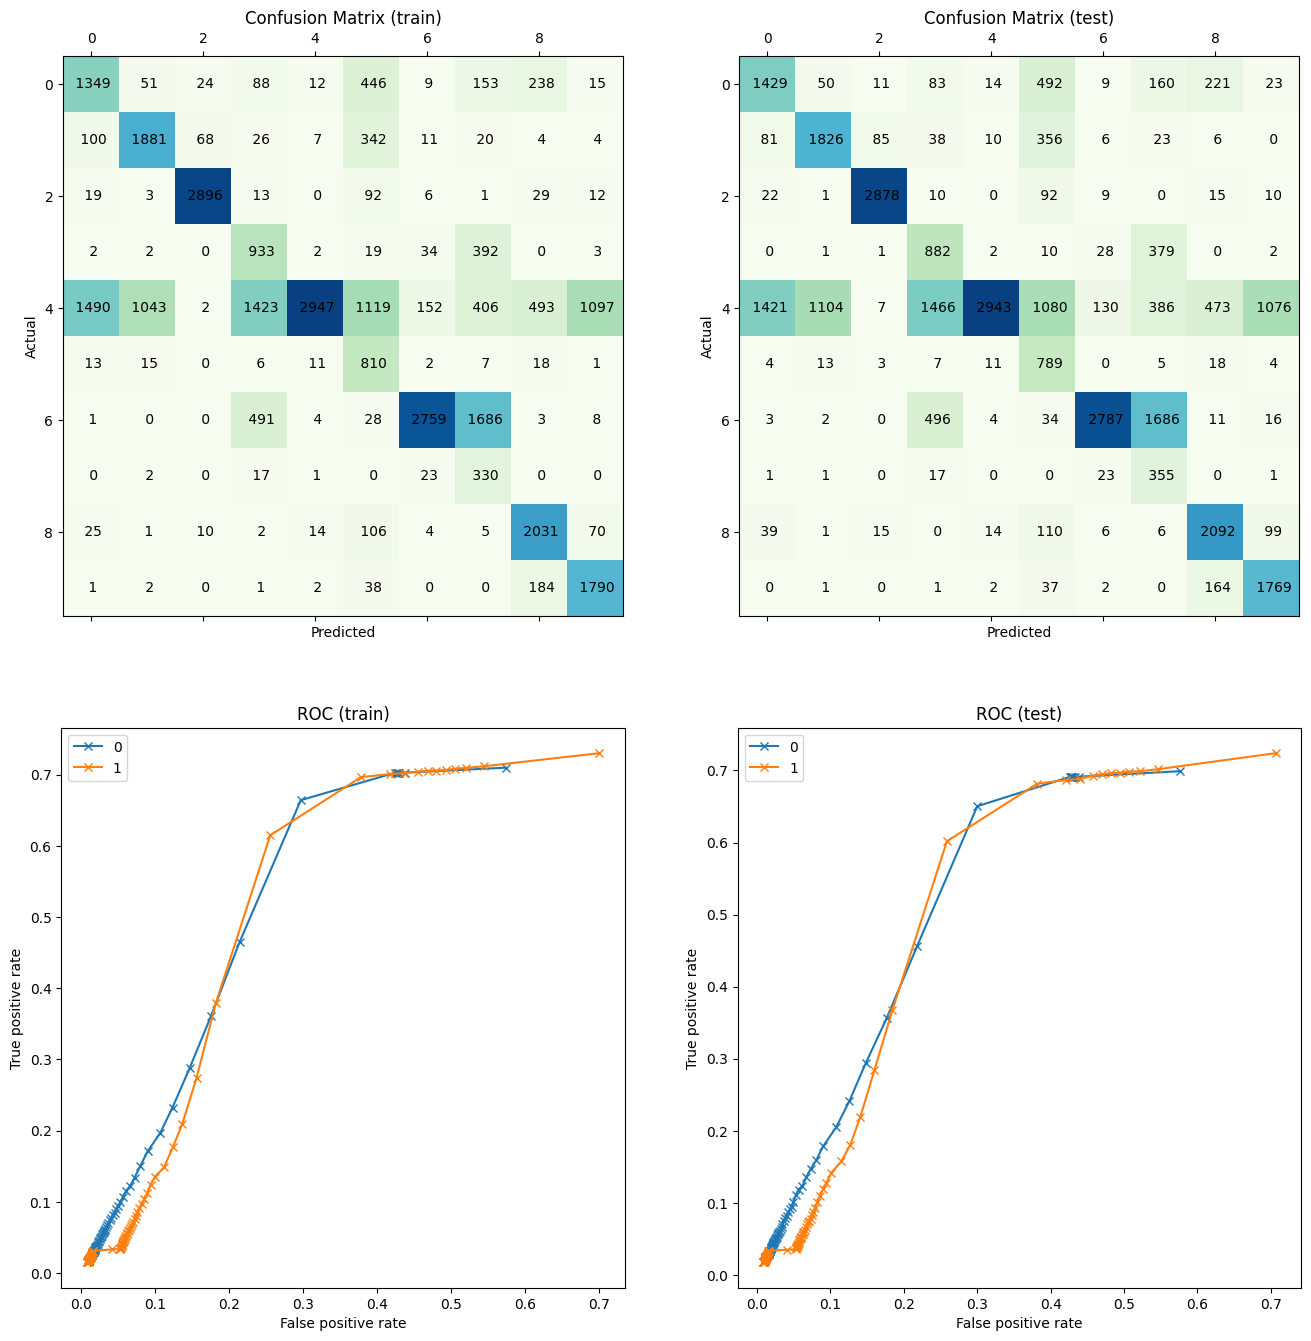

In [35]:
p4["result"][0] = metrics.print(*p4["splitData"][2], naiveLogNormal)

### Test split -- 70:30

------------------ Train ---------------------
Classification Accuracy :  0.6032142857142857
F1 Score                :  [0.52110138 0.68908007 0.95599999 0.48995865 0.45408023 0.41554614
 0.72346447 0.20941968 0.77344064 0.71998855]
------------------ Test ----------------------
Classification Accuracy :  0.6018333333333333
F1 Score                :  [0.53183298 0.67460815 0.95661785 0.46557147 0.45419454 0.42312633
 0.72132577 0.21386719 0.77839506 0.71938088]
Confusion Matrix        : 
[[ 898   43    8    1  822    3    2    1   22    0]
 [  31 1076    1    1  680    7    2    0    1    1]
 [   6   49 1731    1    6    2    0    0    5    0]
 [  48   18    6  666  854    4  191   13    0    0]
 [  11    6    0    0 1765    4    2    0   10    2]
 [ 312  182   56   13  641  494   15    1   69   17]
 [   9    5    5   27   85    0 1654   13    2    0]
 [  90   10    0  349  220    1  907  219    4    0]
 [ 152    1    6    0  275   17    5    0 1261   83]
 [  20    0    6    3  624    

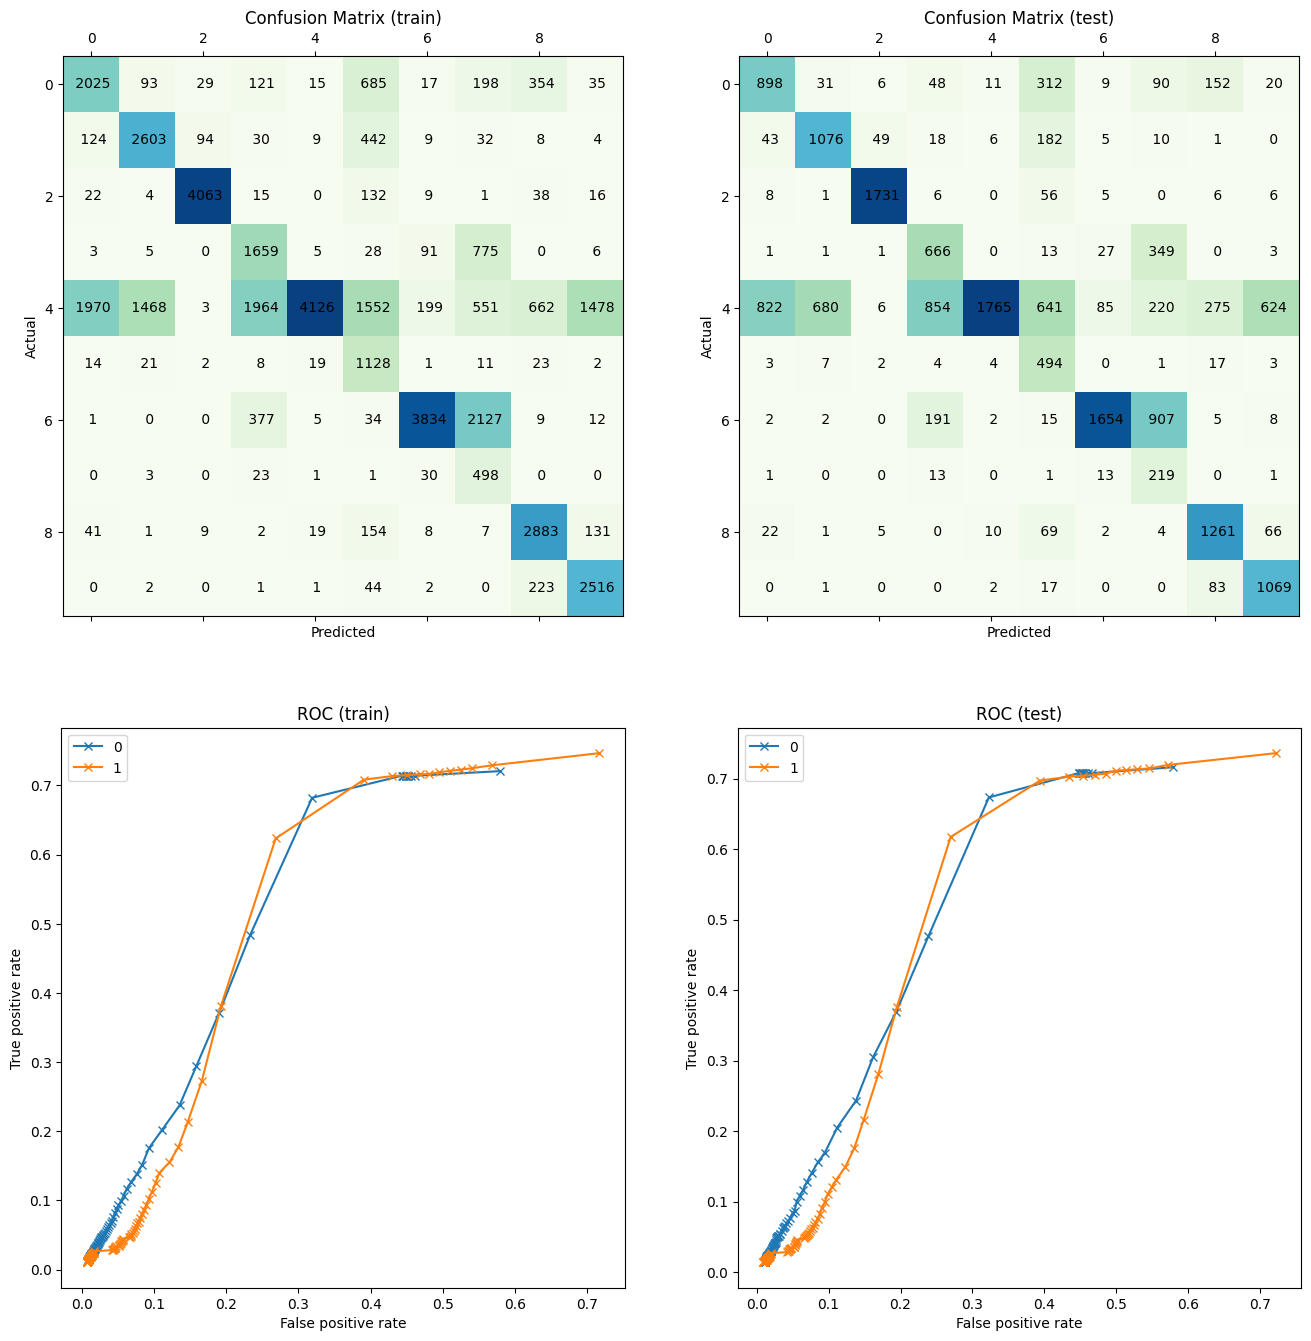

In [36]:
p4["result"][0] = metrics.print(*p4["splitData"][3], naiveLogNormal)

### Test split -- 90:10

------------------ Train ---------------------
Classification Accuracy :  0.6046296296296296
F1 Score                :  [0.52457719 0.68831034 0.95527302 0.4858512  0.45485351 0.42217788
 0.72915587 0.22502425 0.77641685 0.71626336]
------------------ Test ----------------------
Classification Accuracy :  0.6061666666666666
F1 Score                :  [0.52241379 0.69165885 0.96859504 0.47983454 0.45620864 0.41092327
 0.73041168 0.20913107 0.78228782 0.72396359]
Confusion Matrix        : 
[[303  11   2   0 273   0   1   0  10   0]
 [ 11 369   0   0 218   0   1   0   1   0]
 [  1  11 586   0   2   0   0   0   0   0]
 [ 20   7   0 232 283   2  55   1   0   0]
 [  5   3   0   0 586   2   1   0   3   0]
 [132  57  16   5 198 158   8   1  23   2]
 [  3   3   3  11  23   0 550   6   1   0]
 [ 36   6   0 119  79   0 287  71   2   0]
 [ 42   0   2   0  94   7   2   0 424  29]
 [  7   0   1   0 213   0   1   0  20 358]]


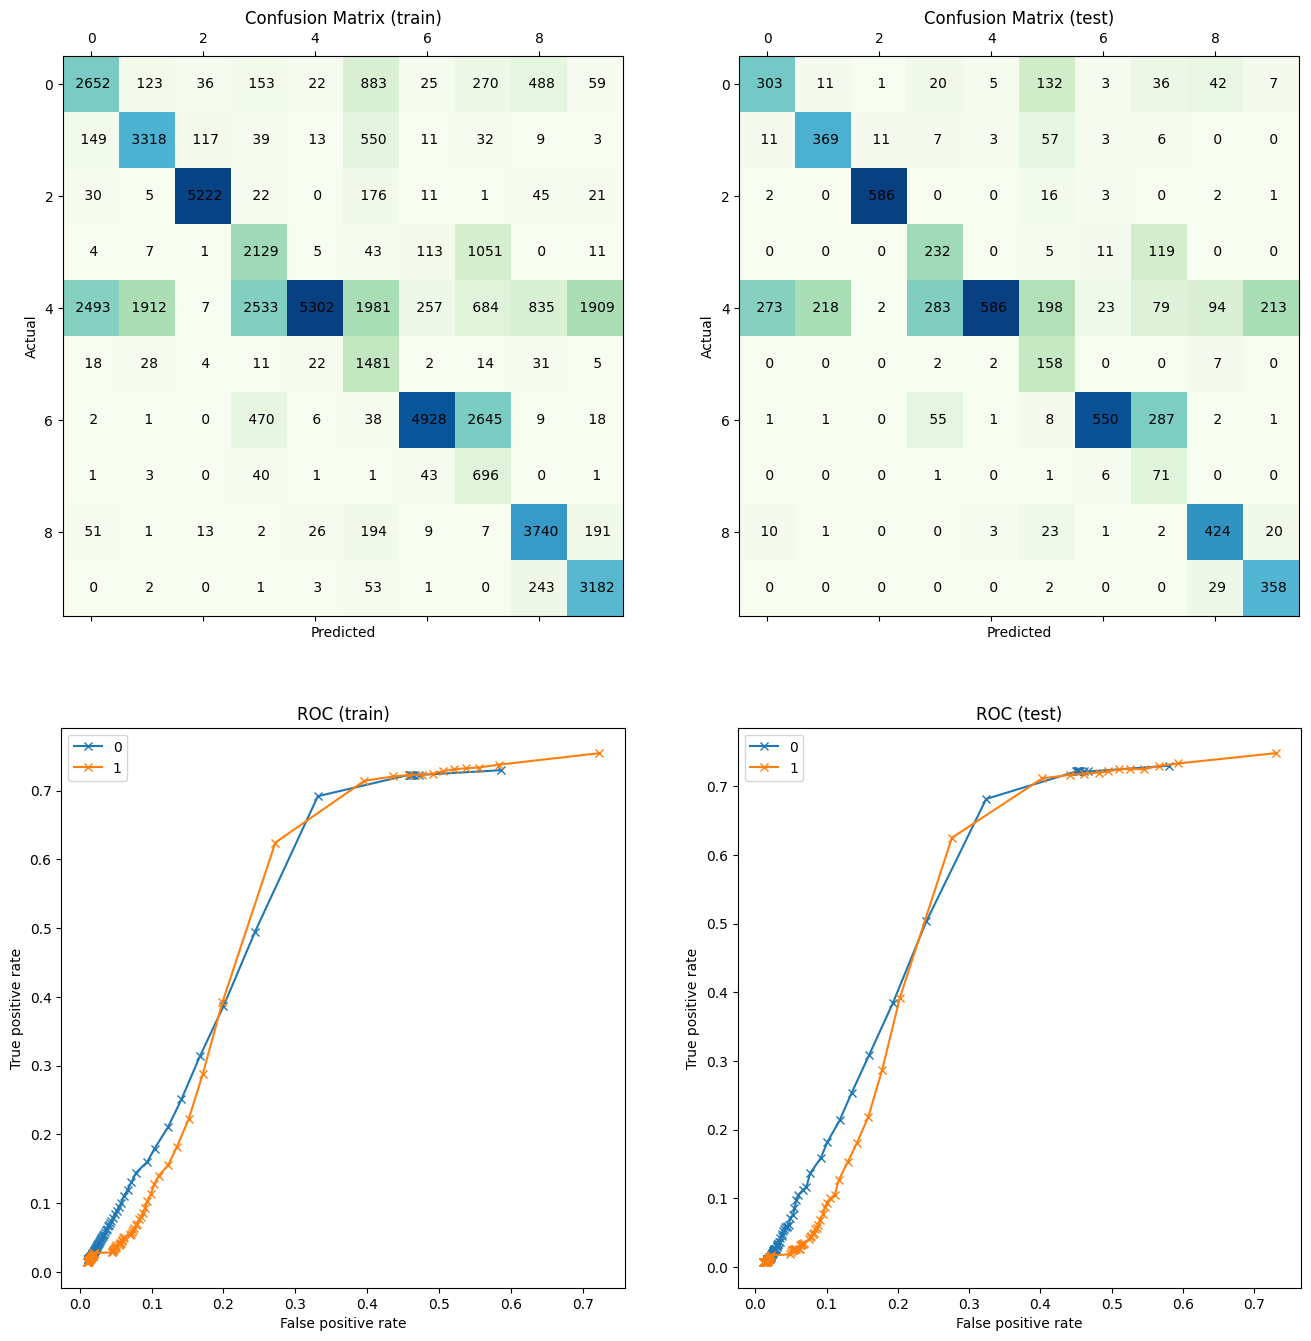

In [37]:
p4["result"][0] = metrics.print(*p4["splitData"][4], naiveLogNormal)

## GMM

In [ ]:
def printGmm(data, number_of_guassians=5):
    classStatsGMM = {}
    for label in data[-1]:
        classStatsGMM[label] = { "prior": classStats[label]["prior"] }
        classStatsGMM[label]["weights"], classStatsGMM[label]["mean"], classStatsGMM[label]["cov"] = em(classStats[label]["data"], number_of_guassians, 50)

    metrics.print(*data[:-1], classStatsGMM, logGMM, result=False)

### Test split -- 20:80

In [ ]:
printGmm(p4["splitData"][0])

### Test split -- 30:70

In [ ]:
printGmm(p4["splitData"][1])

### Test split -- 50:50

In [ ]:
printGmm(p4["splitData"][2])

### Test split -- 70:30

In [ ]:
printGmm(p4["splitData"][3])

### Test split -- 90:10

In [ ]:
printGmm(p4["splitData"][4])

## Logistic Regression

In [38]:
def logisticRegressor(data):
    X_train,y_train_orig , X_test, y_test_orig, classStats = data
    num_classes = 10
    num_samples = y_train_orig.shape[0]
    y_train = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        y_train[i, int(y_train_orig[i]) - 1] = 1

    # Define sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define softmax function
    def softmax(x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # Initialize weights and biases
    num_features = X_train.shape[1]
    W = np.random.randn(num_features, num_classes)
    b = np.random.randn(num_classes)

    # Set hyperparameters
    learning_rate = 0.1
    num_iterations = 1000
    epsilon = 1e-8

    # Train model using gradient descent
    prev_loss = float('inf')
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)

        # Compute loss
        loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

        # Backward propagation
        dz = y_pred - y_train
        dW = np.dot(X_train.T, dz) / num_samples
        db = np.sum(dz, axis=0) / num_samples

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Check stopping criterion
        if prev_loss - loss < epsilon:
            print('Stopping criterion met')
            break

        prev_loss = loss

    # Evaluate model on test set
    z = np.dot(X_test, W) + b
    y_pred = np.argmax(softmax(z), axis=1) + 1
    accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test accuracy:', accuracy)

    z_train = np.dot(X_train, W) + b
    y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
    train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
    train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
    print('Training empirical risk:', train_loss)
    print('Training error rate:', train_error_rate)

    # Compute empirical risk on test data
    num_samples_test = y_test_orig.shape[0]
    y_test = np.zeros((num_samples_test, num_classes))
    for i in range(num_samples_test):
        y_test[i, int(y_test_orig[i]) - 1] = 1

    z_test = np.dot(X_test, W) + b
    test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
    test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test empirical risk:', test_loss)
    print('Test error rate:', test_error_rate)

    num_classes = len(np.unique(y_test_orig))
    confusion_matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_test_orig)):
        true_class = int(y_test_orig[i] - 1)
        predicted_class = int(y_pred[i] - 1)
        confusion_matrix[true_class, predicted_class] += 1
    # print('Confusion matrix:')
    # print(confusion_matrix)


    num_classes = len(np.unique(y_test_orig))
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        true_positives = confusion_matrix[i, i]
        false_positives = np.sum(confusion_matrix[:, i]) - true_positives
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
        precision = true_positives / (true_positives + false_positives + 1e-8)
        recall = true_positives / (true_positives + false_negatives + 1e-8)
        f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
    print('Class-wise F1 score:')
    print(f1_scores)

    # Choose two classes
    class_1 = 5
    class_2 = 3

    # Get predicted probabilities for the two classes
    y_class_1 = y_pred == class_1
    y_class_2 = y_pred == class_2
    y_prob_1 = softmax(z)[:, class_1 - 1]
    y_prob_2 = softmax(z)[:, class_2 - 1]

    # Compute true positive rate and false positive rate
    num_thresholds = 100
    tpr = np.zeros(num_thresholds)
    fpr = np.zeros(num_thresholds)
    for i in range(num_thresholds):
        threshold = i / (num_thresholds - 1)
        tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
        fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
        tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
        fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
        tpr[i] = tp / (tp + fn + 1e-8)
        fpr[i] = fp / (fp + tn + 1e-8)

    # Plot RoC curve and confusion matrix
    fig, ax = plt.subplots(2, 1, figsize=(10, 20))
    ax[0].matshow(confusion_matrix, cmap='GnBu')
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    ax[0].set_title("Confusion Matrix")
    for (x, y), value in np.ndenumerate(confusion_matrix):
        ax[0].text(x, y, f"{value: .0f}", va="center", ha="center")
    
    ax[1].plot(fpr, tpr, marker='x')
    ax[1].set_xlabel("False positive rate")
    ax[1].set_ylabel("True positive rate")                     
    ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))
    
    fig.tight_layout()

### Test split -- 20:80

Test accuracy: 0.5005625
Training empirical risk: 1.8222462108384867
Training error rate: 0.50075
Test empirical risk: 1.8210913444636176
Test error rate: 0.4994375
Class-wise F1 score:
[0.32772117 0.84992633 0.08821276 0.63180601 0.6693446  0.48642808
 0.43761077 0.71987837 0.59946703 0.32683863]


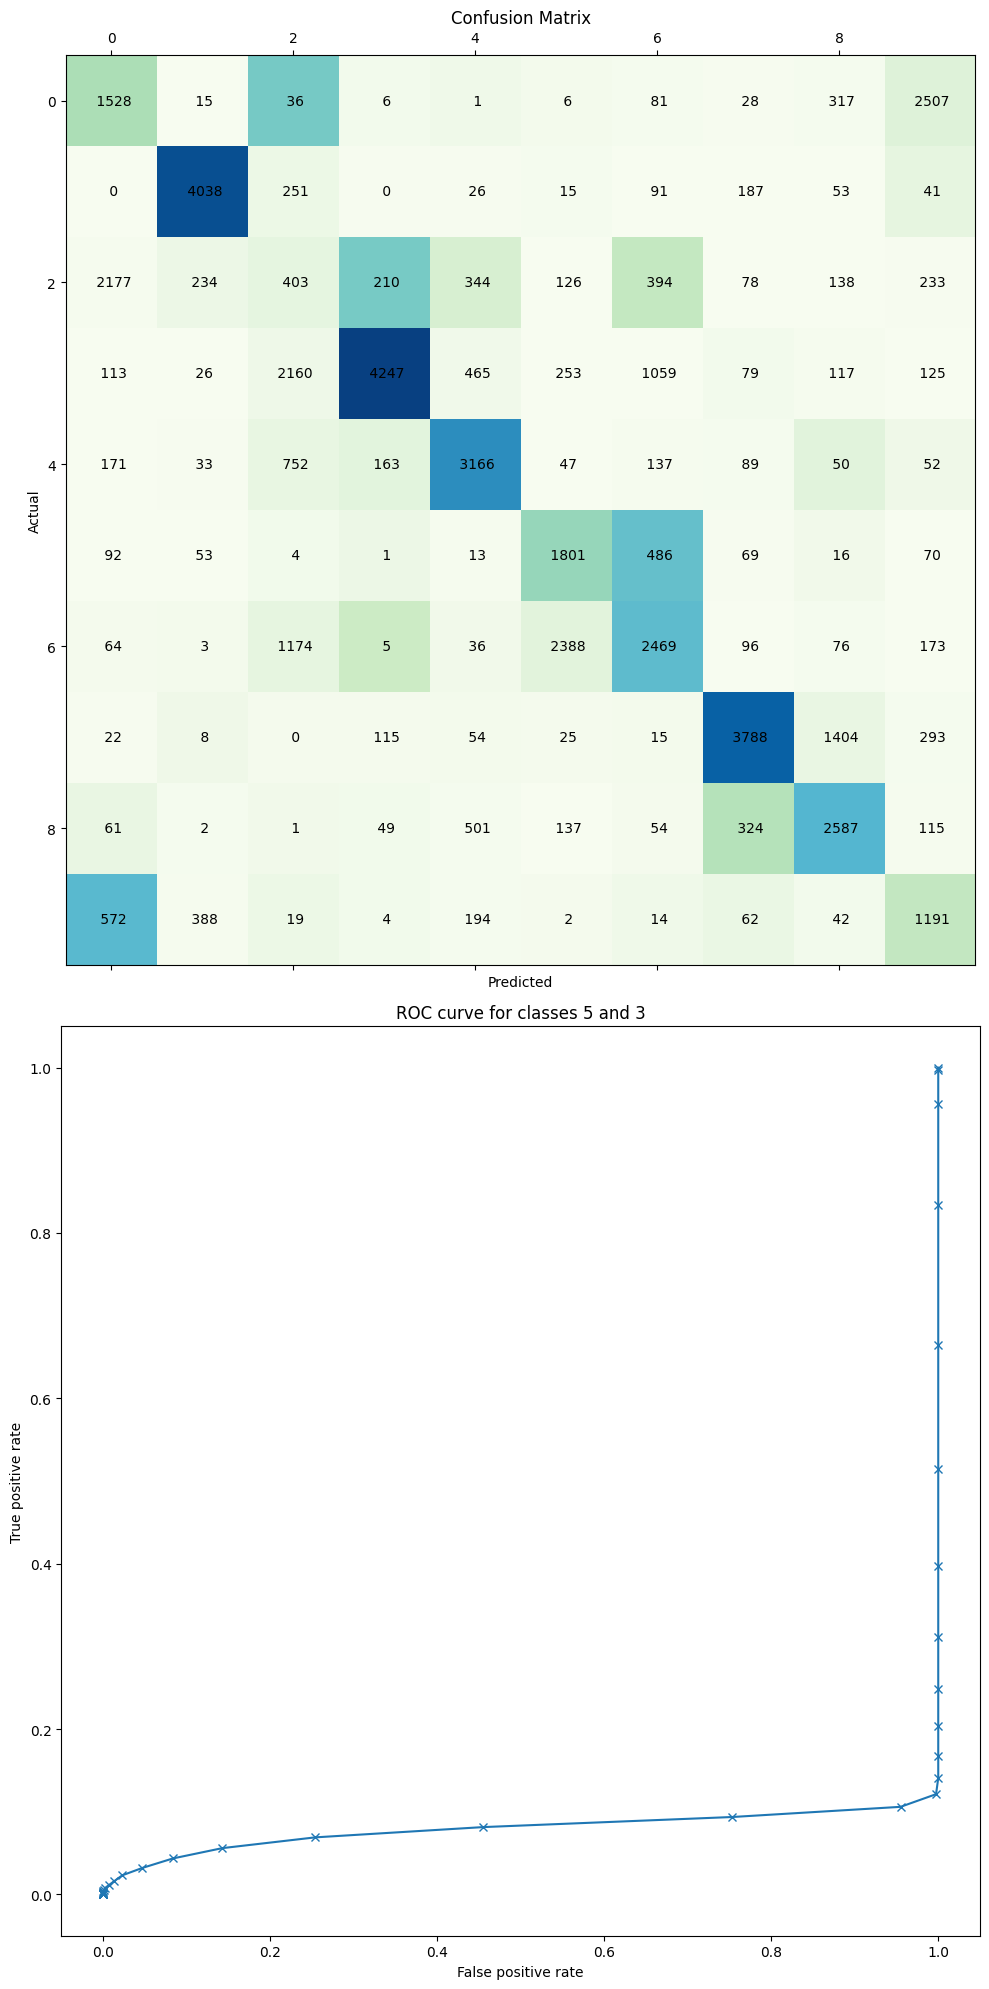

In [39]:
logisticRegressor(p4["splitData"][0])

### Test split -- 30:70

Test accuracy: 0.4713095238095238
Training empirical risk: 1.775760752397493
Training error rate: 0.5321111111111111
Test empirical risk: 1.7801331084705425
Test error rate: 0.5286904761904763
Class-wise F1 score:
[0.57392708 0.58801101 0.53855112 0.70729667 0.33220443 0.36604414
 0.43922082 0.3936772  0.60323468 0.53800604]


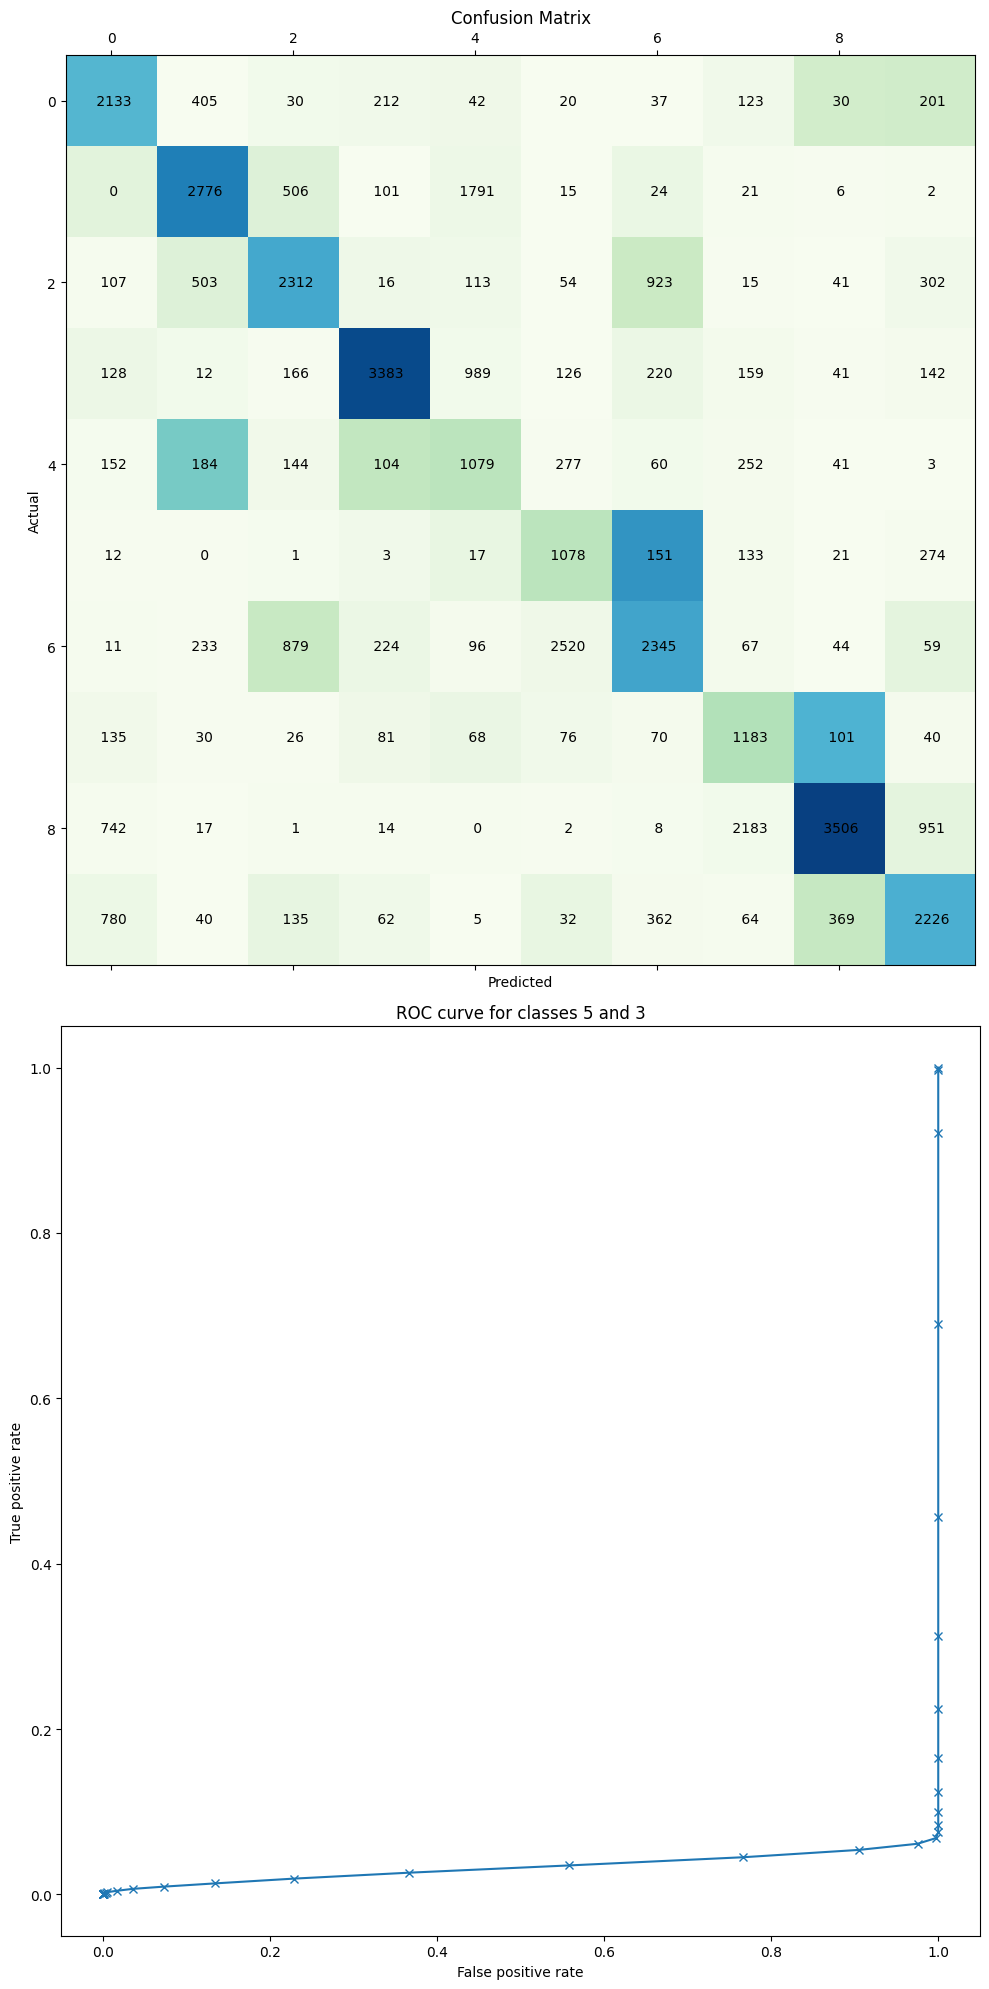

In [40]:
logisticRegressor(p4["splitData"][1])

### Test split -- 50:50

Test accuracy: 0.4825
Training empirical risk: 1.7876155058515901
Training error rate: 0.5203333333333333
Test empirical risk: 1.7854331358915774
Test error rate: 0.5175000000000001
Class-wise F1 score:
[0.62596048 0.34822695 0.64526542 0.71017087 0.27411497 0.67353835
 0.49842689 0.48268029 0.55502063 0.5836728 ]


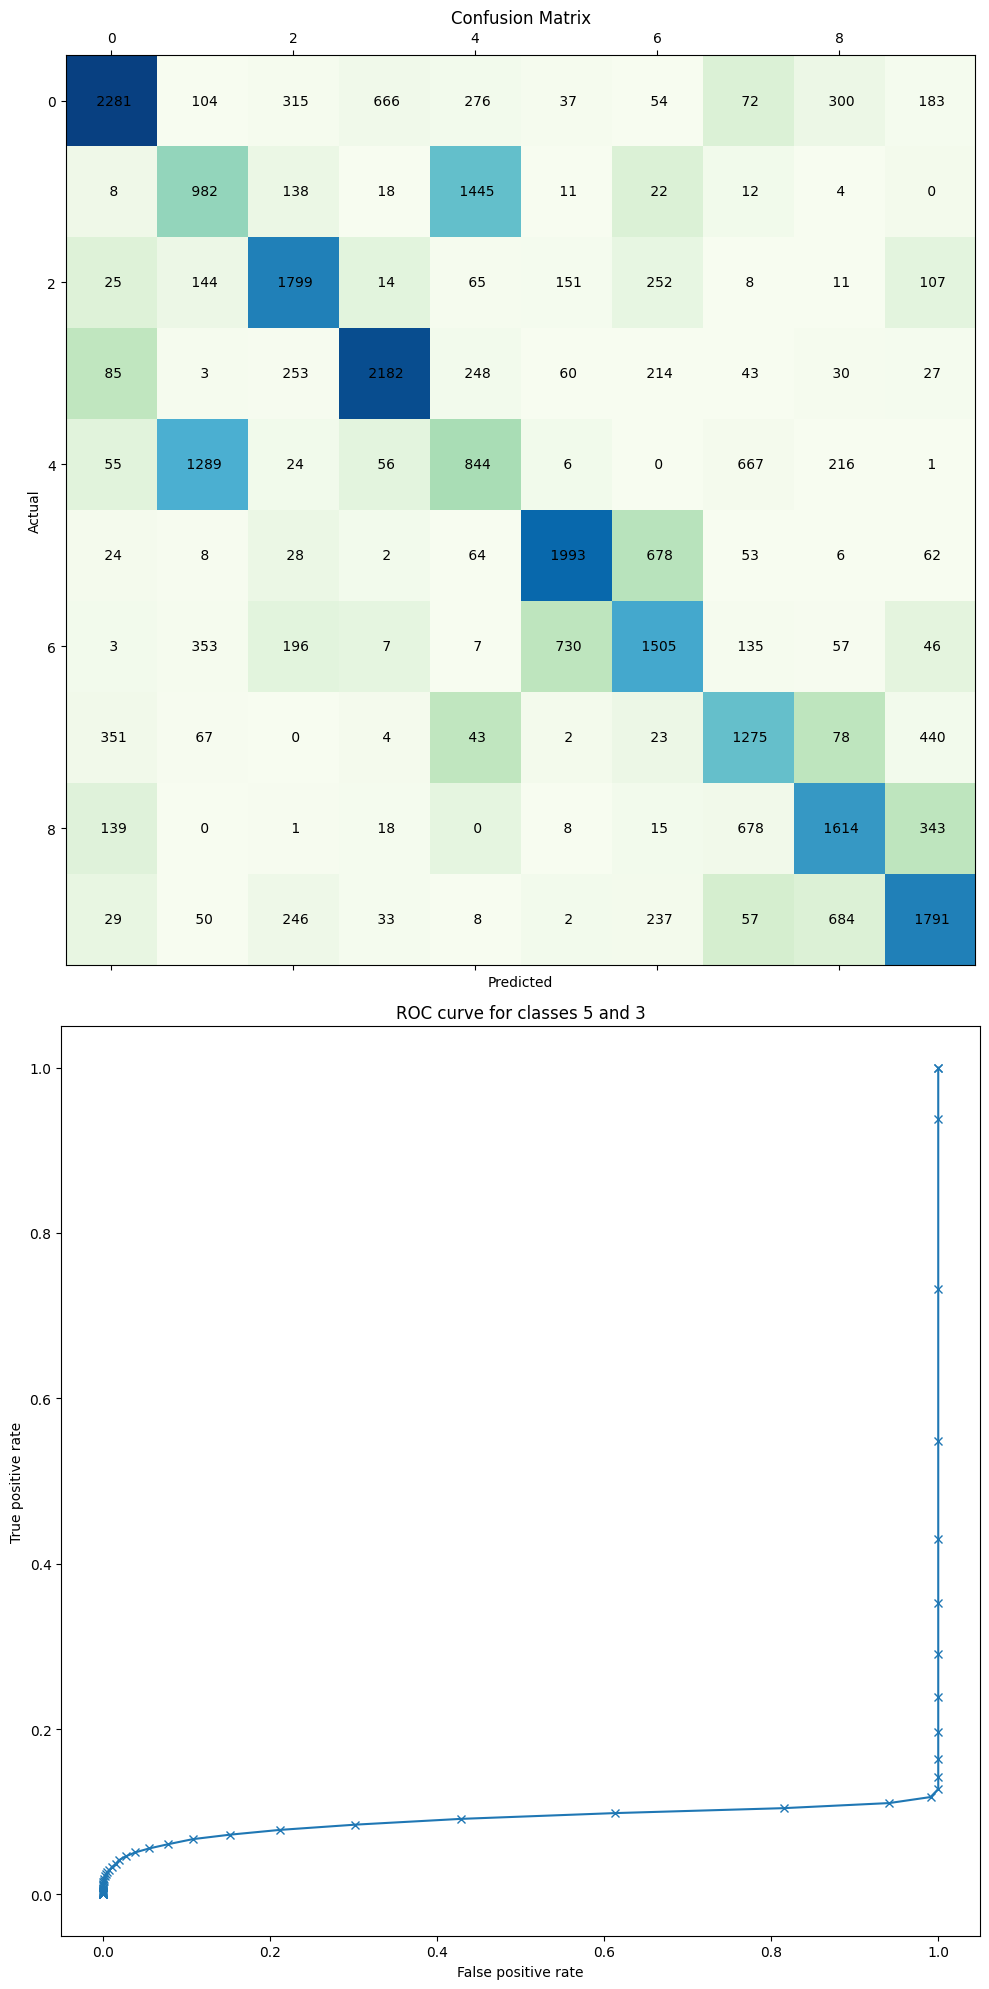

In [41]:
logisticRegressor(p4["splitData"][2])

### Test split -- 70:30

Test accuracy: 0.5106666666666667
Training empirical risk: 1.7110886799402838
Training error rate: 0.48519047619047617
Test empirical risk: 1.7141322417012106
Test error rate: 0.4893333333333333
Class-wise F1 score:
[0.63713203 0.85797872 0.56725146 0.67469287 0.5383693  0.47614548
 0.36256218 0.44278074 0.513037   0.73169413]


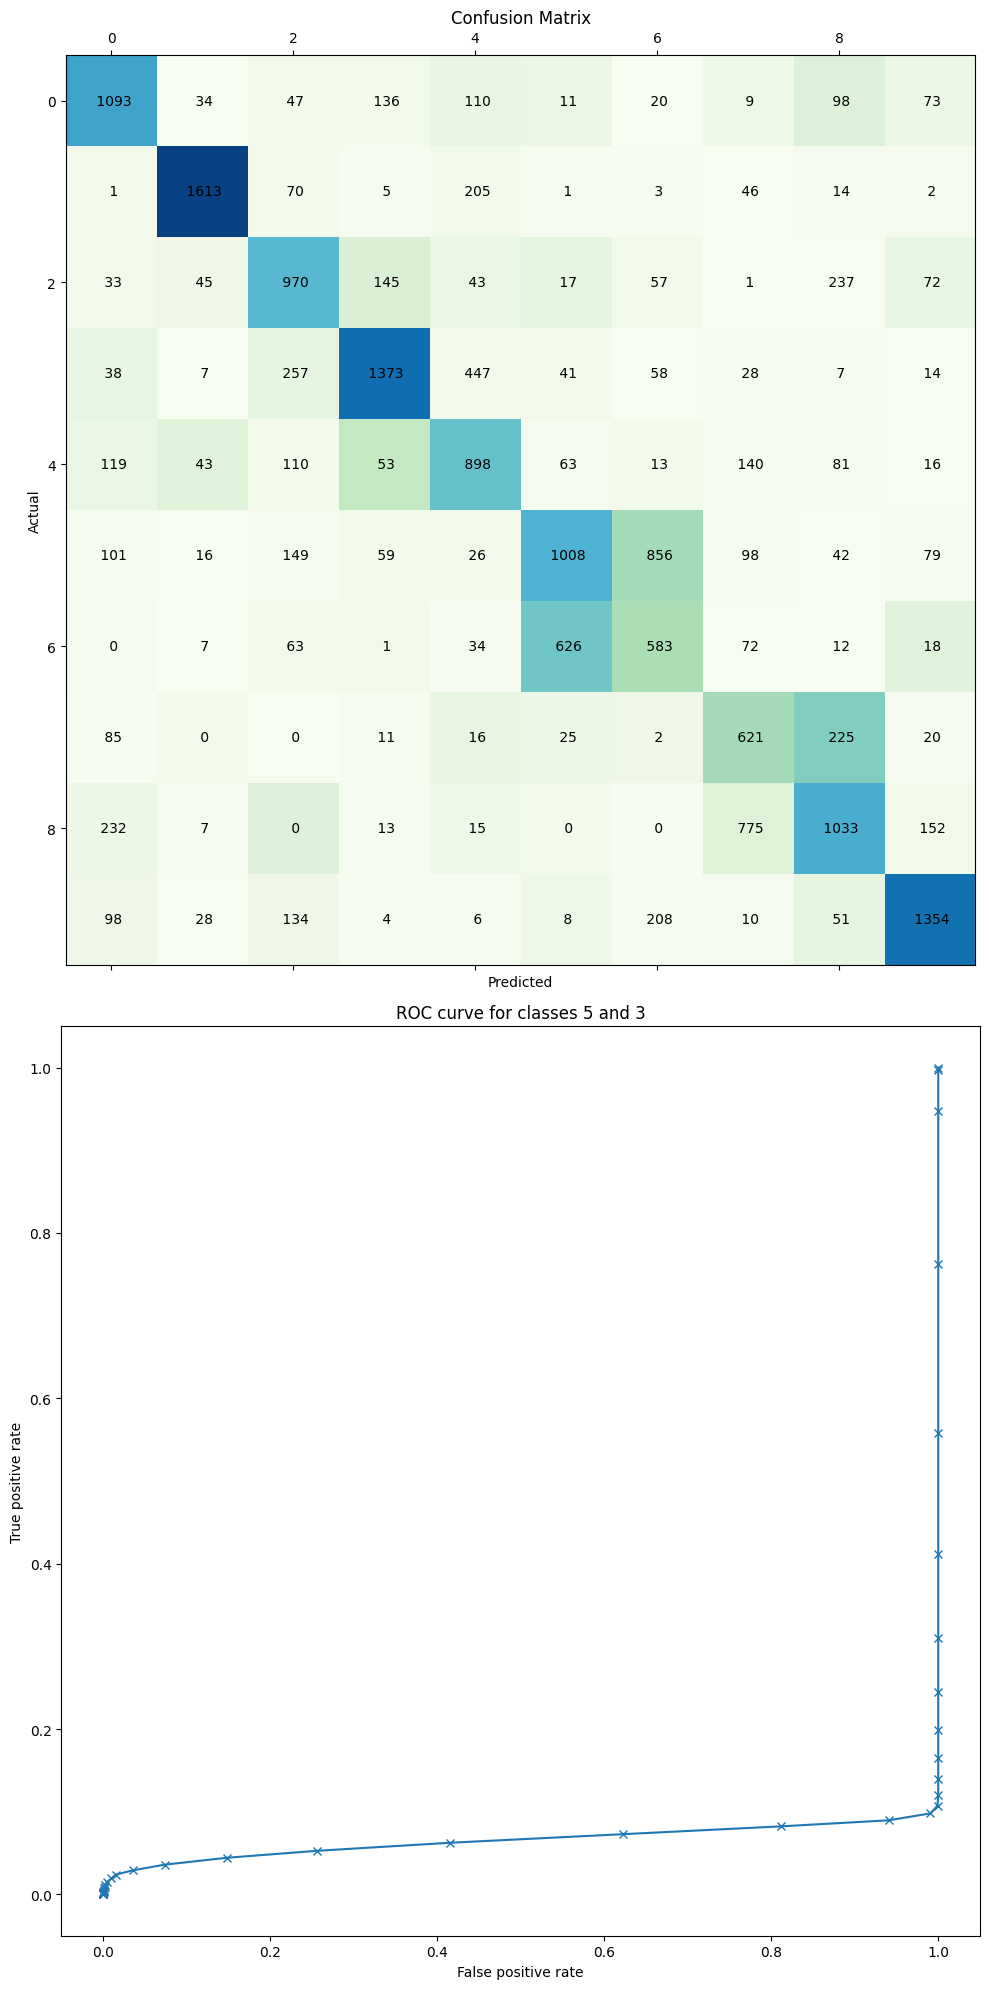

In [42]:
logisticRegressor(p4["splitData"][3])

### Test split -- 90:10

Test accuracy: 0.6073333333333333
Training empirical risk: 1.642891892593064
Training error rate: 0.3858703703703704
Test empirical risk: 1.6430408239695895
Test error rate: 0.3926666666666667
Class-wise F1 score:
[0.69847856 0.93344566 0.53279515 0.64981036 0.45454545 0.84848484
 0.55977229 0.70347003 0.50115651 0.4330097 ]


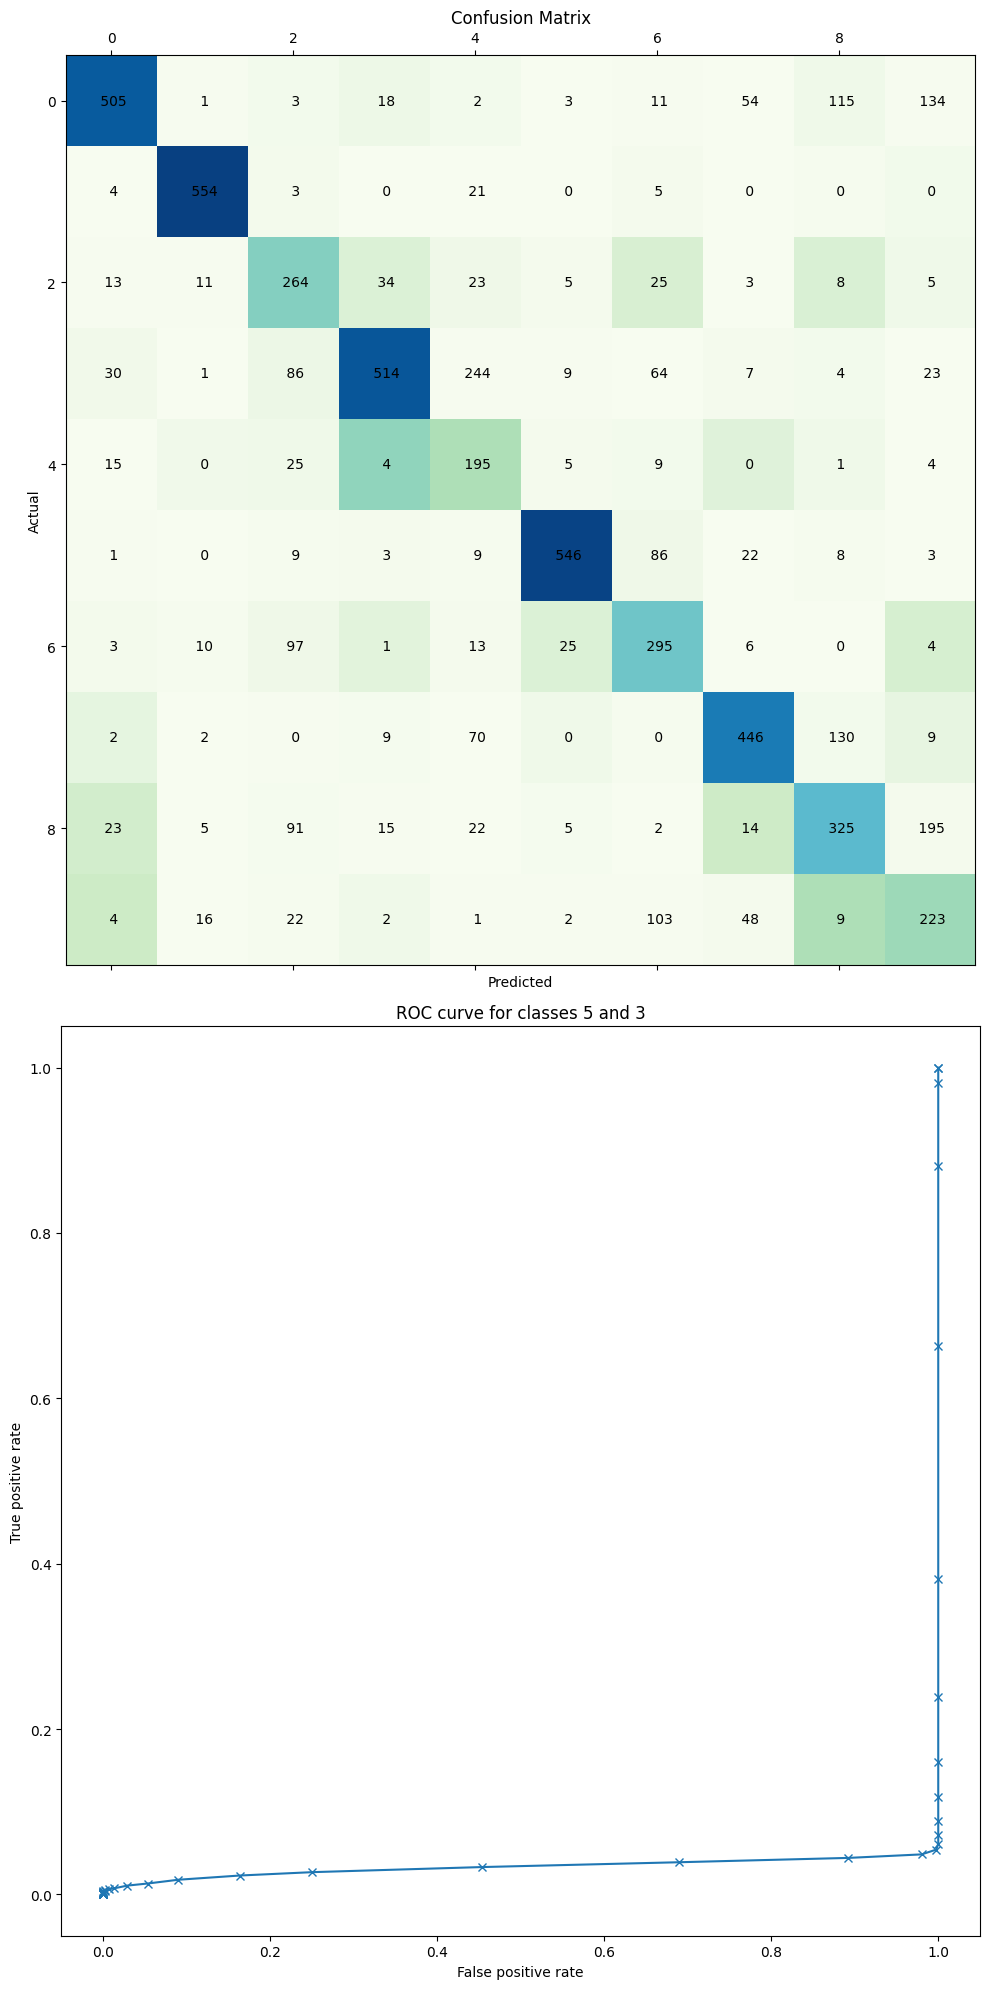

In [43]:
logisticRegressor(p4["splitData"][4])

# P5 (Multi-class classification)

In this part, the data from the previous problem is ’condensed’ (using PCA) to **10 dimensions**. Repeat the above experiment with all the models and metrics and record your observations.

**DATA:** `PCA_MNIST`(KannadaMNISTPCA.csv)

## Data handling

In [50]:
p5["data"] = np.genfromtxt(dataFolder + "/PCA_MNIST.csv", delimiter=',')[1:]

In [51]:
p5["data"].shape

(60000, 11)

In [52]:
def stats(label, data, stats=False):
    X = data
    Y = label * np.ones(data.shape[0])
    if stats:
        return X, Y, { "mean": np.mean(X, axis=0), "cov": np.cov(X.T), "prior": data.shape[0] }
    return X, Y

classWiseData = [[] for _ in range(10)]
for row in p5["data"]:
    label = int(row[0])
    classWiseData[label].append(row[1:])
    
p5["splitData"] = [trainTestSplit(np.array(classWiseData), r, stats) for r in [0.2, 0.3, 0.5, 0.7, 0.9]]

## Naive Bayes

In [53]:
p5["result"] = [[] for _ in range(5)]

### Test split -- 20:80

------------------ Train ---------------------
Classification Accuracy :  0.8640833333333333
F1 Score                :  [0.84823284 0.91498973 0.9248215  0.84786859 0.90199335 0.90719063
 0.75204125 0.74108266 0.89643605 0.90416845]
------------------ Test ----------------------
Classification Accuracy :  0.854375
F1 Score                :  [0.83821604 0.87003058 0.94207317 0.80709744 0.91437112 0.91423125
 0.76746191 0.69763779 0.88382838 0.91434712]
Confusion Matrix        : 
[[4163  253   72  150    2    0    2   22  107   29]
 [ 333 3983   21  311   15    0    1    1   41   94]
 [  40    6 4635   10    1   98    0    9    0    1]
 [  59    0   75 4253   13   38  237  118    2    5]
 [   2    2    8  308 4282  139    2    4    8   45]
 [   1   24  126  170  116 4317   12   18   14    2]
 [   5    0   22   29    2   26 4005  708    2    1]
 [  40    1   28  235   19    9 1359 3101    0    8]
 [ 368   78   28  181   30   14    2   16 4017   66]
 [ 122    9   25   92   86    3   17   9

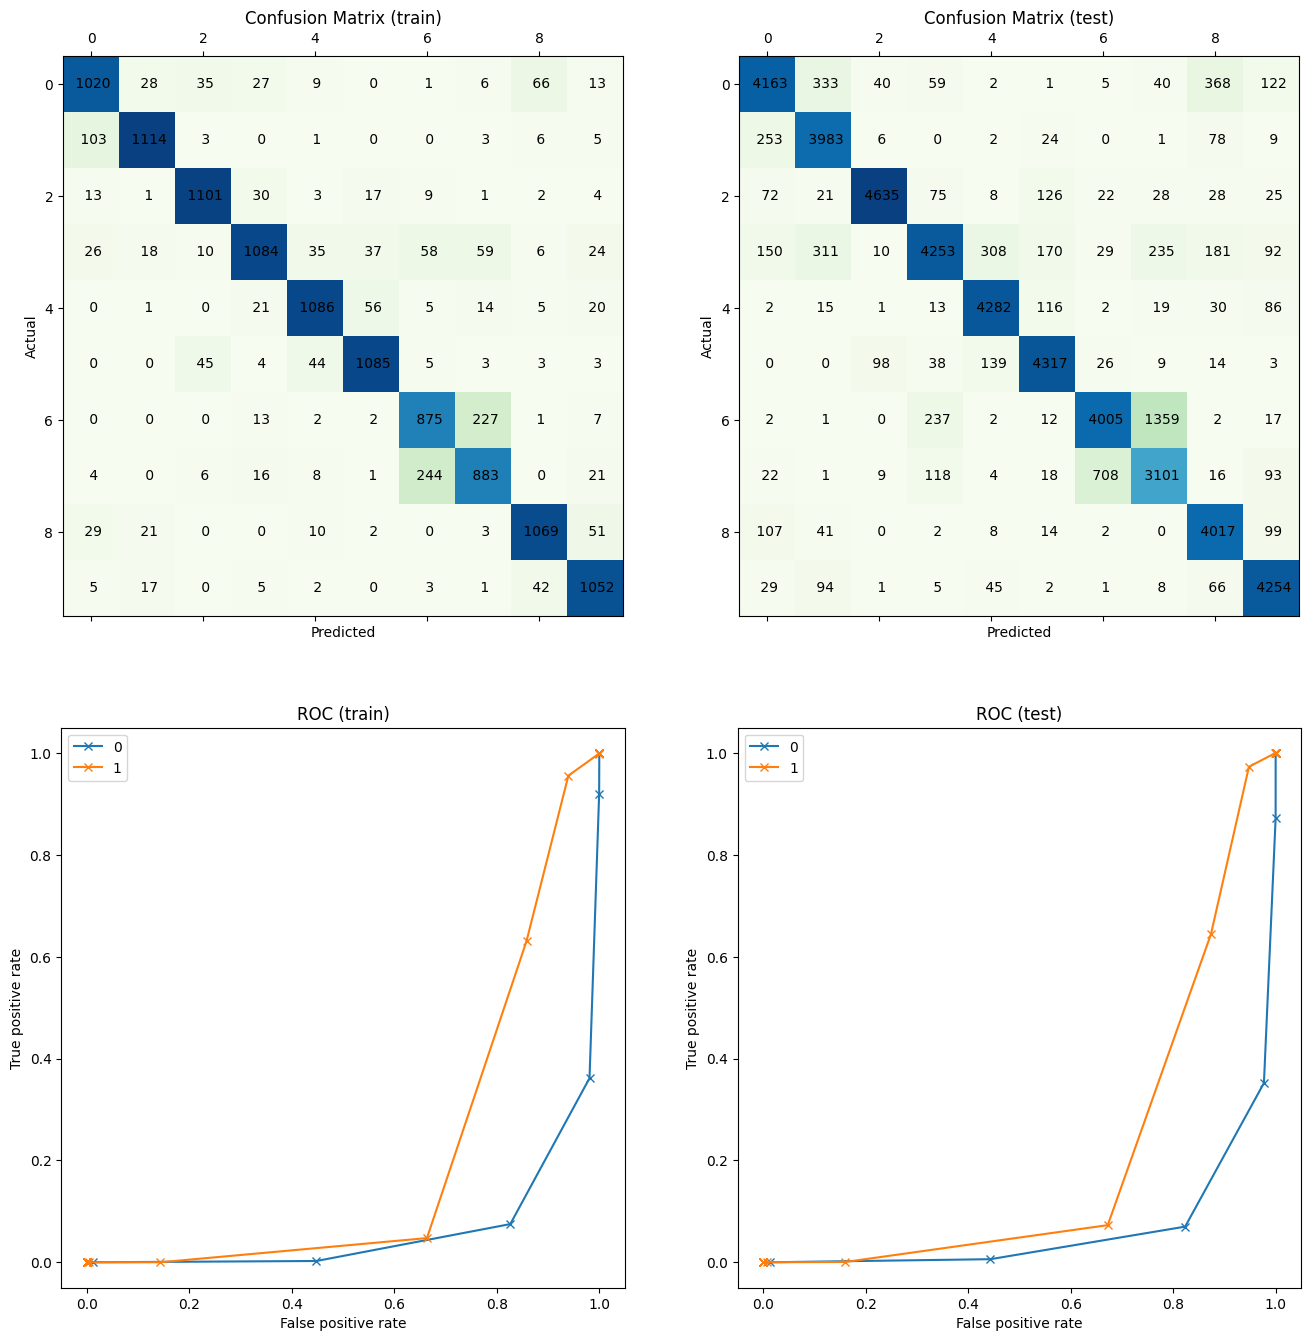

In [54]:
p5["result"][0] = metrics.print(*p5["splitData"][0], naiveLogNormal)

### Test split -- 30:70

------------------ Train ---------------------
Classification Accuracy :  0.8564444444444445
F1 Score                :  [0.81181619 0.89885762 0.94455389 0.81713848 0.90327914 0.91272522
 0.77424702 0.70992144 0.88957746 0.90383514]
------------------ Test ----------------------
Classification Accuracy :  0.8621190476190477
F1 Score                :  [0.85914998 0.88204881 0.9513269  0.85045986 0.92769637 0.9135239
 0.75937301 0.67712008 0.88513761 0.91660424]
Confusion Matrix        : 
[[3669  292    5   50    2    0    3   38  126   15]
 [ 219 3668    4  191   14    0    0    1   48   55]
 [  58    8 3997    7    1  107    0   20    0    2]
 [  35    1   36 3745   15   46  202  113    2    5]
 [   0    1    4  152 3862  117    1   11   13   39]
 [   0   32   91  112  113 3803    4   23   19    3]
 [   3    3   33   16    1   28 3585  524    5    2]
 [   7    3   25  121   12   11 1428 2591    0    2]
 [ 249   97    6  155   15   12    1   31 3618   16]
 [ 101   12    2   58   91    2

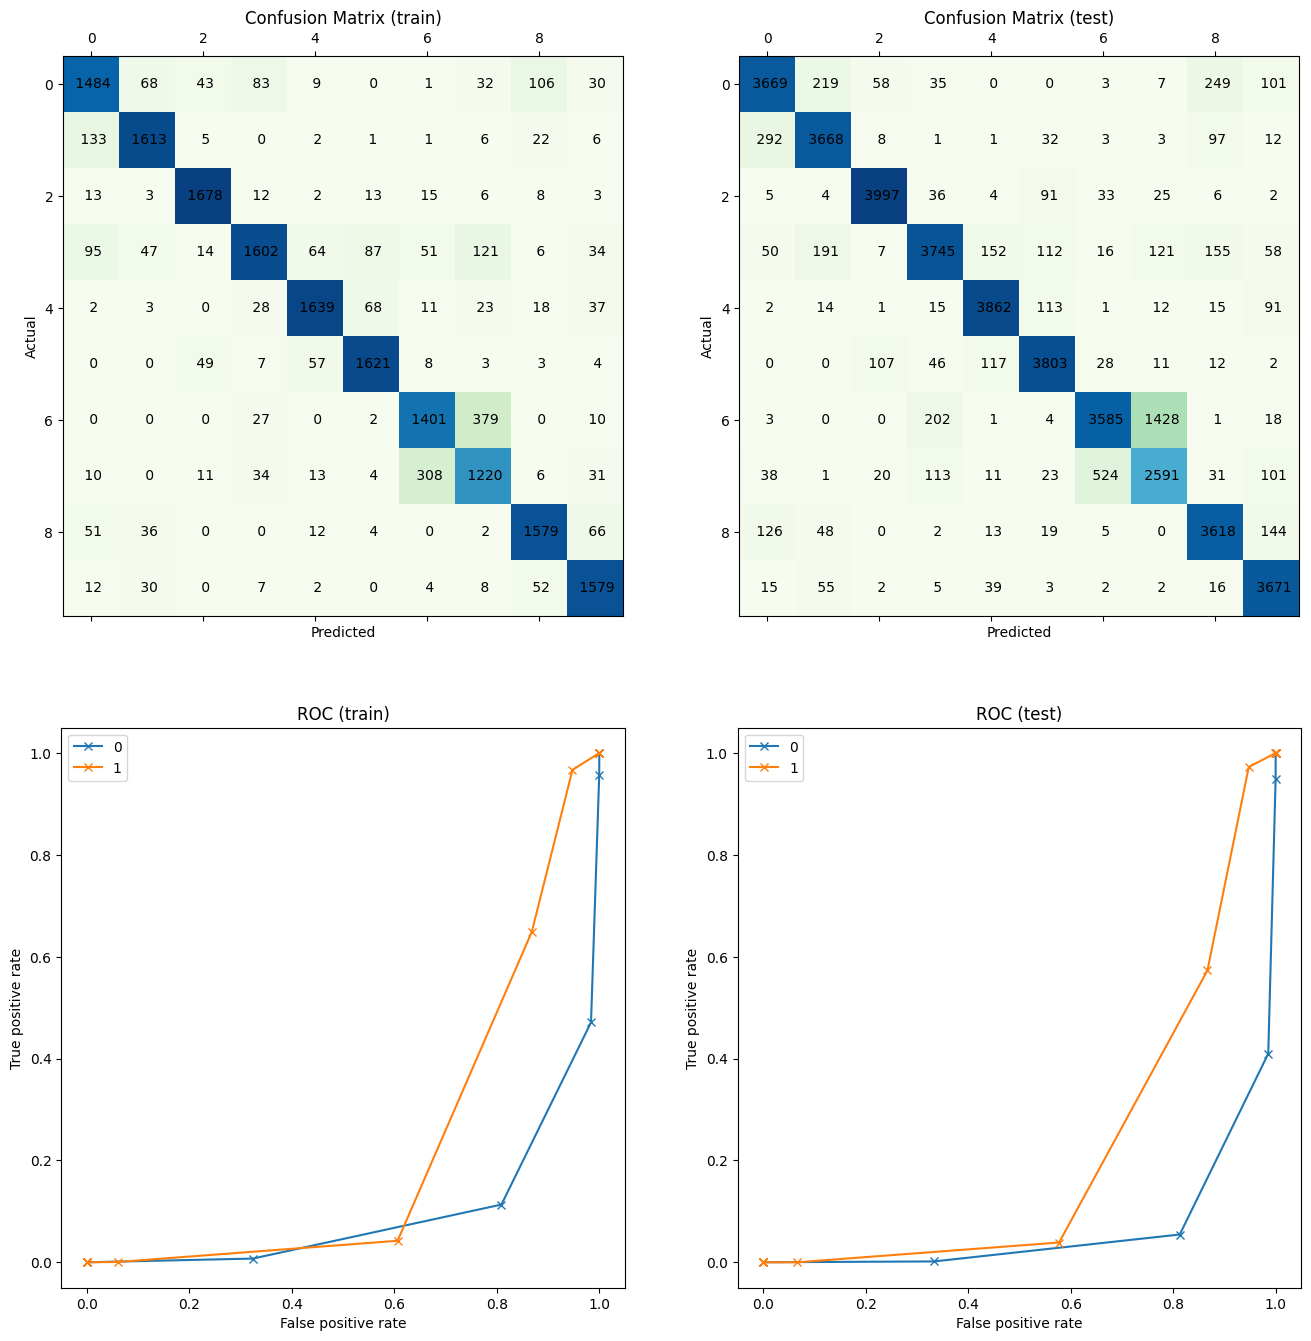

In [55]:
p5["result"][0] = metrics.print(*p5["splitData"][1], naiveLogNormal)

### Test split -- 50:50

------------------ Train ---------------------
Classification Accuracy :  0.8546
F1 Score                :  [0.83338898 0.88577088 0.94113667 0.83933604 0.90362626 0.90924257
 0.76022427 0.71155472 0.86105407 0.90295506]
------------------ Test ----------------------
Classification Accuracy :  0.8749333333333333
F1 Score                :  [0.85766062 0.88504782 0.95464582 0.89912137 0.92656875 0.90888345
 0.77265113 0.69736366 0.92548758 0.92062379]
Confusion Matrix        : 
[[2603  271    3   34    2    0    2   33   43    9]
 [ 140 2637    3  104   22    0    0    2   59   33]
 [  25    6 2810    4    2  151    0    1    0    1]
 [  34    1   17 2763    9   27   81   59    5    4]
 [   0    1    0   48 2776  135    0    6   16   18]
 [   1   18   36   73   62 2788    3    7   11    1]
 [   1    0    2   14    2   19 2537  423    0    2]
 [   6    1   13   91   10    9  939 1931    0    0]
 [ 179   19    3    0    1    5    0    5 2776   12]
 [  81    5    0   15  106    1    5   71 

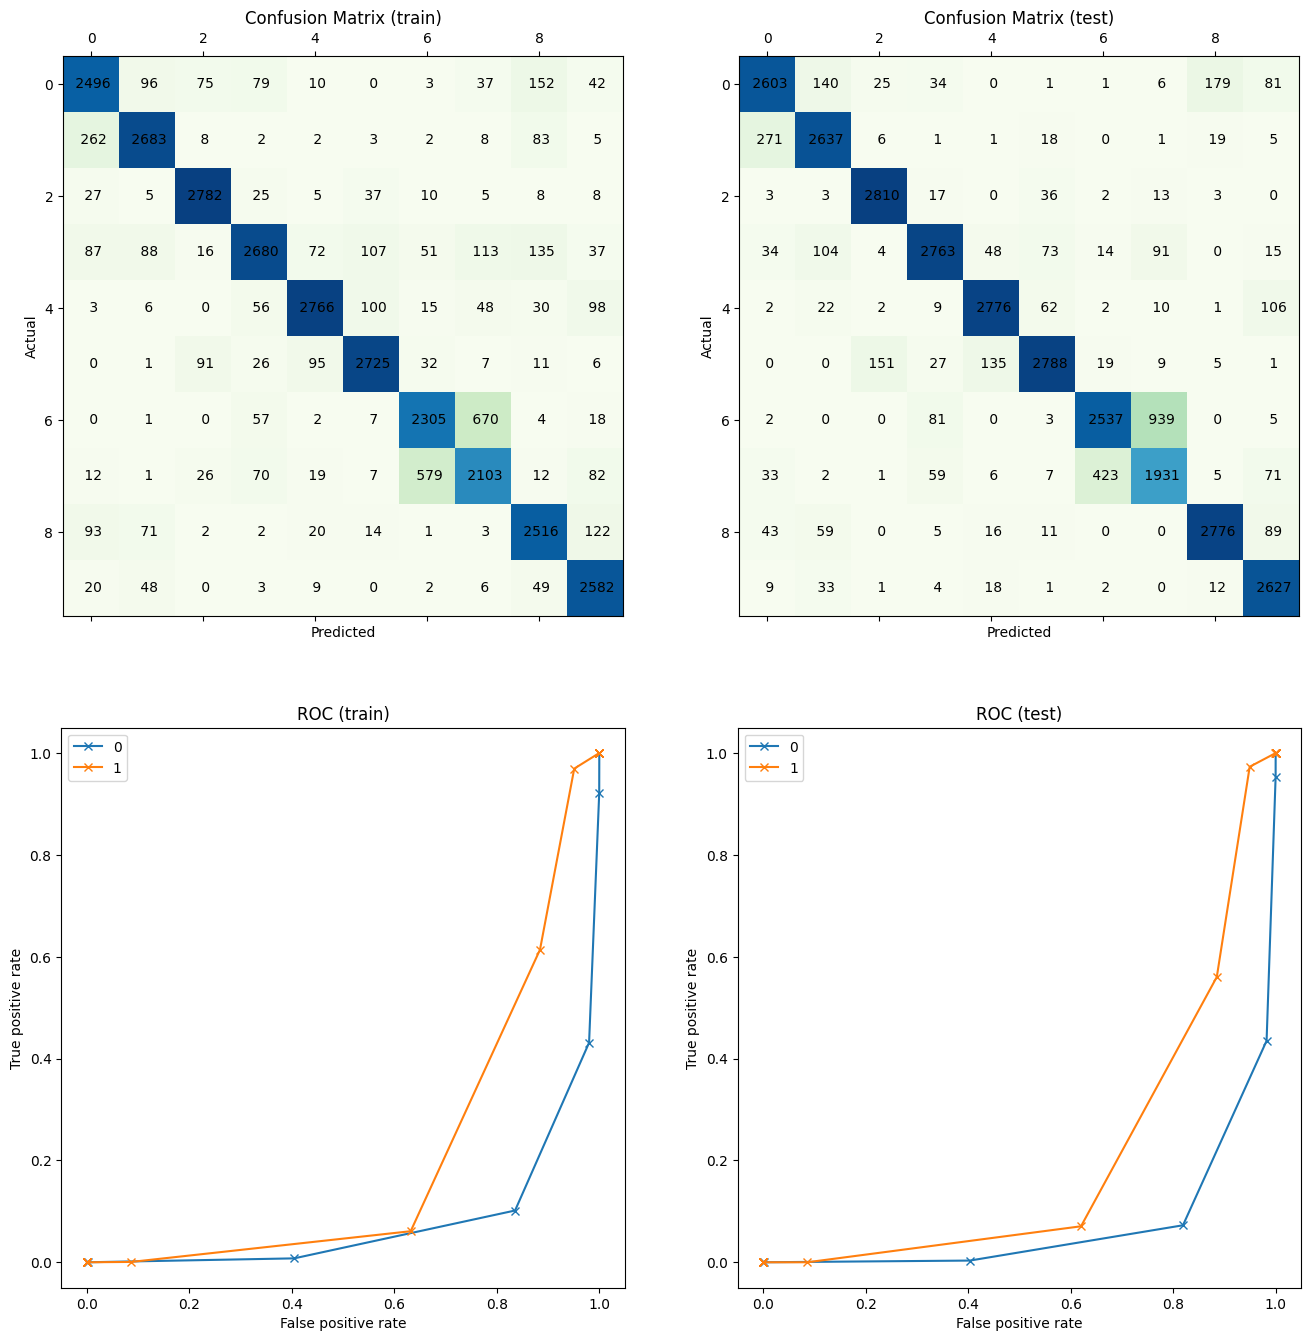

In [56]:
p5["result"][0] = metrics.print(*p5["splitData"][2], naiveLogNormal)

### Test split -- 70:30

------------------ Train ---------------------
Classification Accuracy :  0.8580476190476191
F1 Score                :  [0.83220359 0.88074256 0.94734316 0.84998861 0.89760653 0.91310575
 0.76700058 0.71902226 0.87095203 0.90349024]
------------------ Test ----------------------
Classification Accuracy :  0.8865555555555555
F1 Score                :  [0.89262472 0.89566986 0.94751693 0.92025862 0.95343069 0.92098696
 0.78277697 0.67358184 0.92311842 0.94121054]
Confusion Matrix        : 
[[1646   76    2    9    0    0    3   22   38    4]
 [  92 1541    1   71   18    0    0    0   71    6]
 [  34    6 1679    4    2   71    0    3    0    1]
 [   9    0    3 1708    7    8   36   24    1    4]
 [   0    0    0   10 1730   48    0    3    7    2]
 [   0   13   32   46   38 1661    1    2    4    3]
 [   0    0    9    3    2   11 1618  157    0    0]
 [   4    0   16   59    4    8  670 1039    0    0]
 [  76    2    1    0    1    0    0    1 1711    8]
 [  27    3    1    2   27    

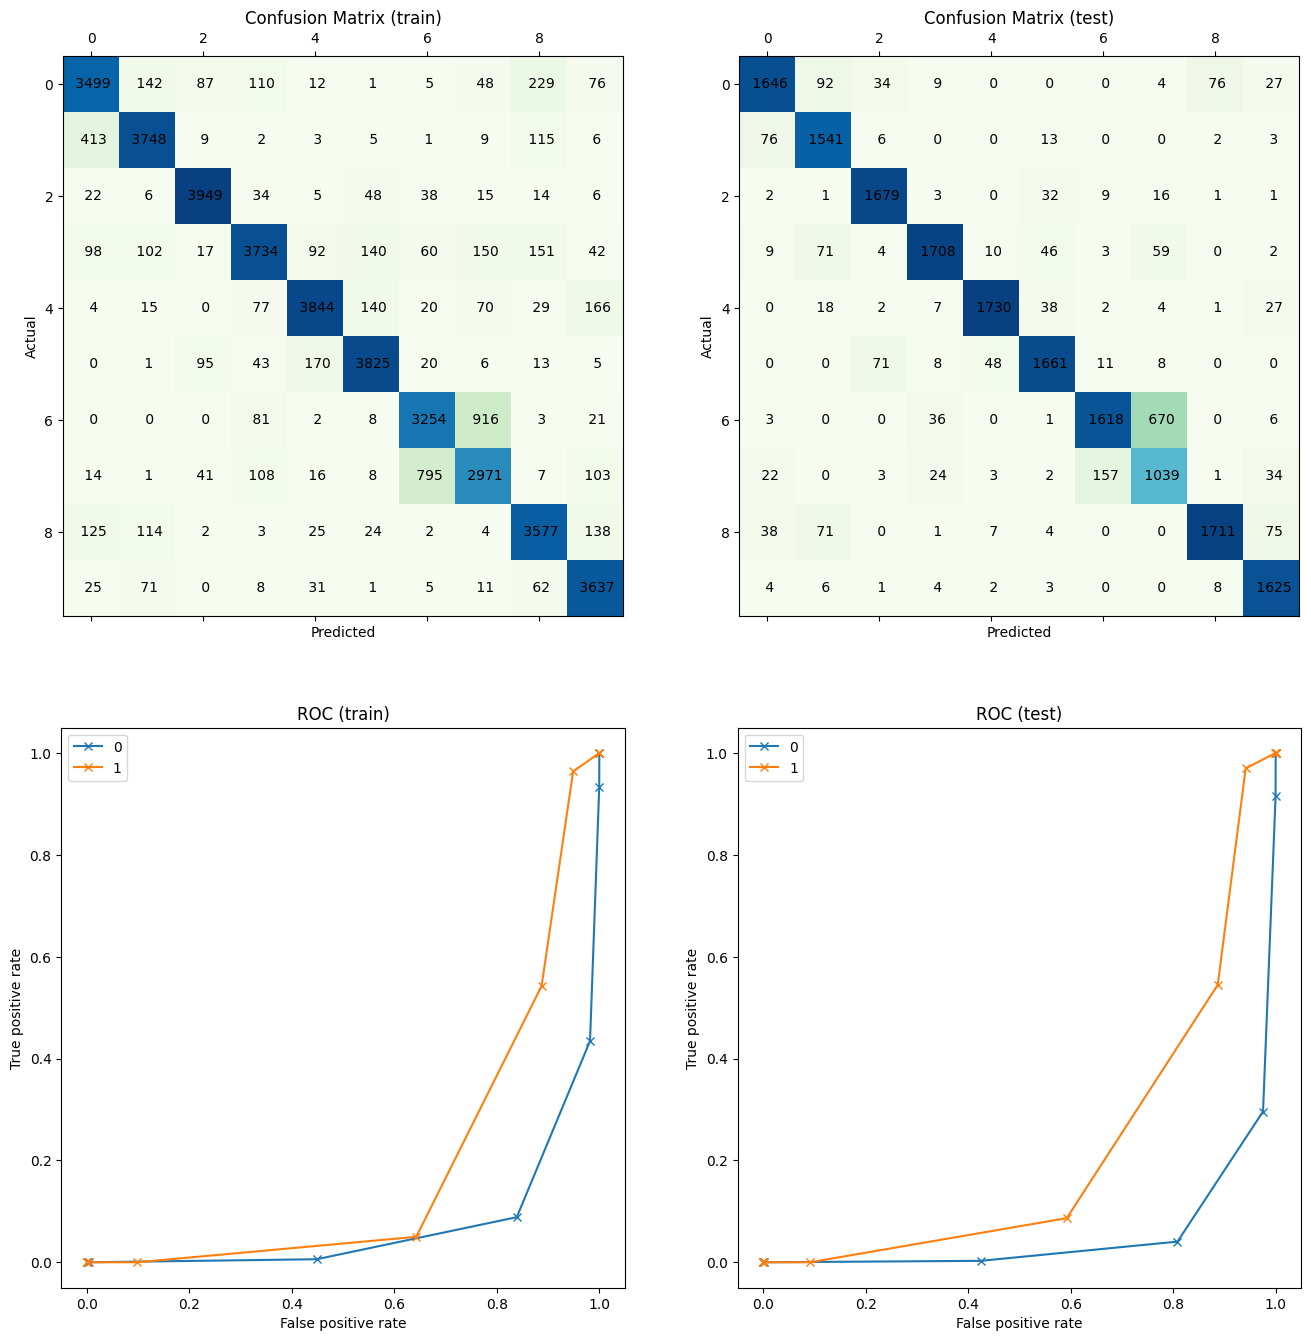

In [57]:
p5["result"][0] = metrics.print(*p5["splitData"][3], naiveLogNormal)

### Test split -- 90:10

------------------ Train ---------------------
Classification Accuracy :  0.8646111111111111
F1 Score                :  [0.8422608  0.89047749 0.95045086 0.86691542 0.91113549 0.91770157
 0.76823604 0.70943966 0.88028633 0.90937227]
------------------ Test ----------------------
Classification Accuracy :  0.8916666666666667
F1 Score                :  [0.91037735 0.86995515 0.92359361 0.91572123 0.94959349 0.92838654
 0.80652335 0.73252562 0.92886345 0.94280762]
Confusion Matrix        : 
[[579  13   1   3   0   0   0   0   4   0]
 [ 21 485   0  47  13   0   0   0  31   3]
 [ 27   6 550   4   0  10   0   2   0   1]
 [  3   0   1 565   7   1   5  16   0   2]
 [  0   0   0   4 584   7   0   1   4   0]
 [  0  11  29   8   9 538   1   2   2   0]
 [  0   0   3   1   0   3 544  49   0   0]
 [  1   0   5   2   1   0 198 393   0   0]
 [ 28   0   0   0   0   0   0   0 568   4]
 [ 13   0   2   0  16   0   1  10  14 544]]


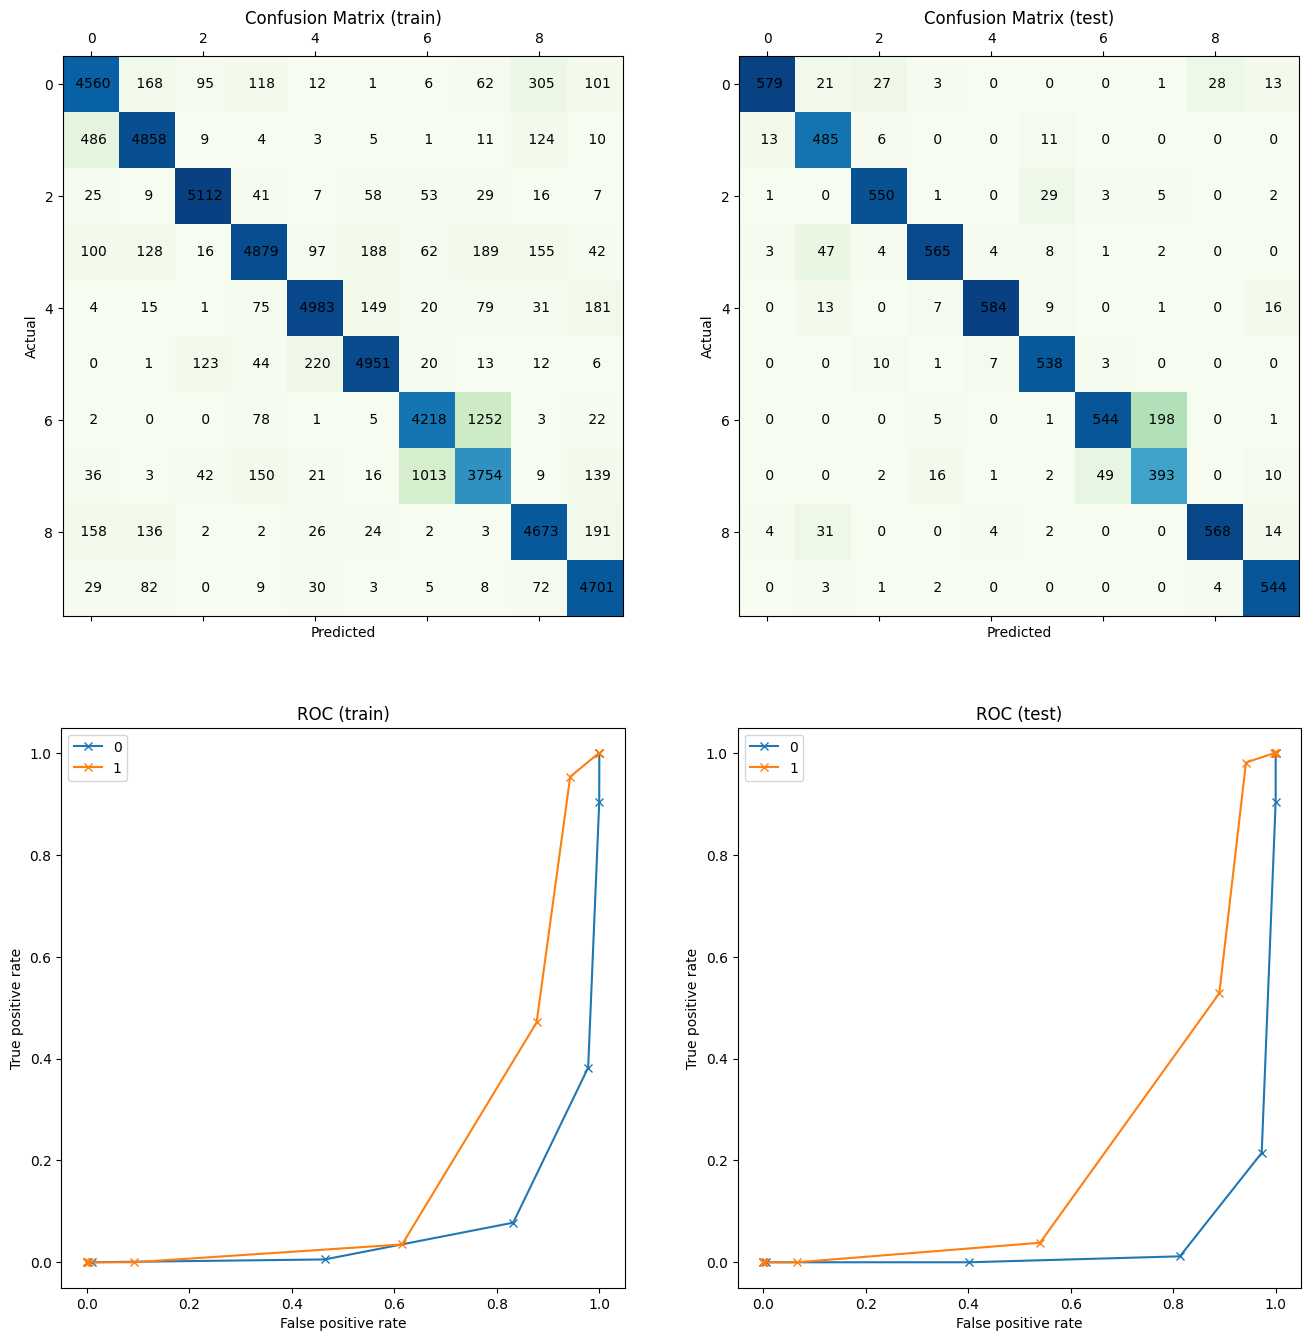

In [58]:
p5["result"][0] = metrics.print(*p5["splitData"][4], naiveLogNormal)

## GMM

### Test split -- 20:80

In [ ]:
printGmm(p5["splitData"][0])

### Test split -- 30:70

In [ ]:
printGmm(p5["splitData"][1])

### Test split -- 50:50

In [ ]:
printGmm(p5["splitData"][2])

### Test split -- 70:30

In [ ]:
printGmm(p5["splitData"][3])

### Test split -- 90:10

In [ ]:
printGmm(p5["splitData"][4])

## Logistic Regression

In [59]:
def logisticRegressor(data):
    X_train,y_train_orig , X_test, y_test_orig, classStats = data
    num_classes = 10
    num_samples = y_train_orig.shape[0]
    y_train = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        y_train[i, int(y_train_orig[i]) - 1] = 1

    # Define sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define softmax function
    def softmax(x):
        # subtract the maximum value from x to avoid overflow
        x -= np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x)
        # divide by the sum of the exponential values along axis 1
        return exp_x / np.sum(exp_x, axis=1, keepdims=True, where=np.isfinite(exp_x))

    # Initialize weights and biases
    num_features = X_train.shape[1]
    W = np.random.randn(num_features, num_classes)
    b = np.random.randn(num_classes)

    # Set hyperparameters
    learning_rate = 0.1
    num_iterations = 1000
    epsilon = 1e-8

    # Train model using gradient descent
    prev_loss = float('inf')
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)

        # Compute loss
        loss = -np.sum(y_train * np.log(y_pred + epsilon)) / num_samples

        # Backward propagation
        dz = y_pred - y_train
        dW = np.dot(X_train.T, dz) / num_samples
        db = np.sum(dz, axis=0) / num_samples

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Check stopping criterion
        if prev_loss - loss < epsilon:
            print('Stopping criterion met')
            break

        prev_loss = loss

    # Evaluate model on test set
    z = np.dot(X_test, W) + b
    y_pred = np.argmax(softmax(z), axis=1) + 1
    accuracy = np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test accuracy:', accuracy)

    z_train = np.dot(X_train, W) + b
    y_train_pred = np.argmax(softmax(z_train), axis=1) + 1
    train_loss = -np.sum(y_train * np.log(softmax(z_train) + epsilon)) / num_samples
    train_error_rate = 1 - np.sum(y_train_pred == y_train_orig) / y_train_orig.shape[0]
    print('Training empirical risk:', train_loss)
    print('Training error rate:', train_error_rate)

    # Compute empirical risk on test data
    num_samples_test = y_test_orig.shape[0]
    y_test = np.zeros((num_samples_test, num_classes))
    for i in range(num_samples_test):
        y_test[i, int(y_test_orig[i]) - 1] = 1

    z_test = np.dot(X_test, W) + b
    test_loss = -np.sum(y_test * np.log(softmax(z_test) + epsilon)) / num_samples_test
    test_error_rate = 1 - np.sum(y_pred == y_test_orig) / y_test_orig.shape[0]
    print('Test empirical risk:', test_loss)
    print('Test error rate:', test_error_rate)

    num_classes = len(np.unique(y_test_orig))
    confusion_matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_test_orig)):
        true_class = int(y_test_orig[i] - 1)
        predicted_class = int(y_pred[i] - 1)
        confusion_matrix[true_class, predicted_class] += 1
    # print('Confusion matrix:')
    # print(confusion_matrix)

    num_classes = len(np.unique(y_test_orig))
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        true_positives = confusion_matrix[i, i]
        false_positives = np.sum(confusion_matrix[:, i]) - true_positives
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
        precision = true_positives / (true_positives + false_positives + 1e-8)
        recall = true_positives / (true_positives + false_negatives + 1e-8)
        f1_scores[i] = 2 * precision * recall / (precision + recall + 1e-8)
    print('Class-wise F1 score:')
    print(f1_scores)

    # Choose two classes
    class_1 = 5
    class_2 = 3

    # Get predicted probabilities for the two classes
    y_class_1 = y_pred == class_1
    y_class_2 = y_pred == class_2
    y_prob_1 = softmax(z)[:, class_1 - 1]
    y_prob_2 = softmax(z)[:, class_2 - 1]

    # Compute true positive rate and false positive rate
    num_thresholds = 100
    tpr = np.zeros(num_thresholds)
    fpr = np.zeros(num_thresholds)
    for i in range(num_thresholds):
        threshold = i / (num_thresholds - 1)
        tp = np.sum((y_prob_1 >= threshold) & (y_class_1 == True))
        fp = np.sum((y_prob_1 >= threshold) & (y_class_1 == False))
        tn = np.sum((y_prob_2 < threshold) & (y_class_2 == True))
        fn = np.sum((y_prob_2 < threshold) & (y_class_2 == False))
        tpr[i] = tp / (tp + fn + 1e-8)
        fpr[i] = fp / (fp + tn + 1e-8)

    # Plot RoC curve and confusion matrix
    fig, ax = plt.subplots(2, 1, figsize=(10, 20))
    ax[0].matshow(confusion_matrix, cmap='GnBu')
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    ax[0].set_title("Confusion Matrix")
    for (x, y), value in np.ndenumerate(confusion_matrix):
        ax[0].text(x, y, f"{value: .0f}", va="center", ha="center")
    
    ax[1].plot(fpr, tpr, marker='x')
    ax[1].set_xlabel("False positive rate")
    ax[1].set_ylabel("True positive rate")                     
    ax[1].set_title("ROC curve for classes {} and {}".format(class_1, class_2))
    
    fig.tight_layout()

### Test split -- 20:80

Stopping criterion met
Test accuracy: 0.7076875
Training empirical risk: 3.8015063494248795
Training error rate: 0.28966666666666663
Test empirical risk: 3.813135859231722
Test error rate: 0.2923125
Class-wise F1 score:
[0.88275711 0.93631562 0.6839201  0.84589939 0.87795874 0.72174116
 0.06757022 0.91193903 0.87843137 0.84869455]


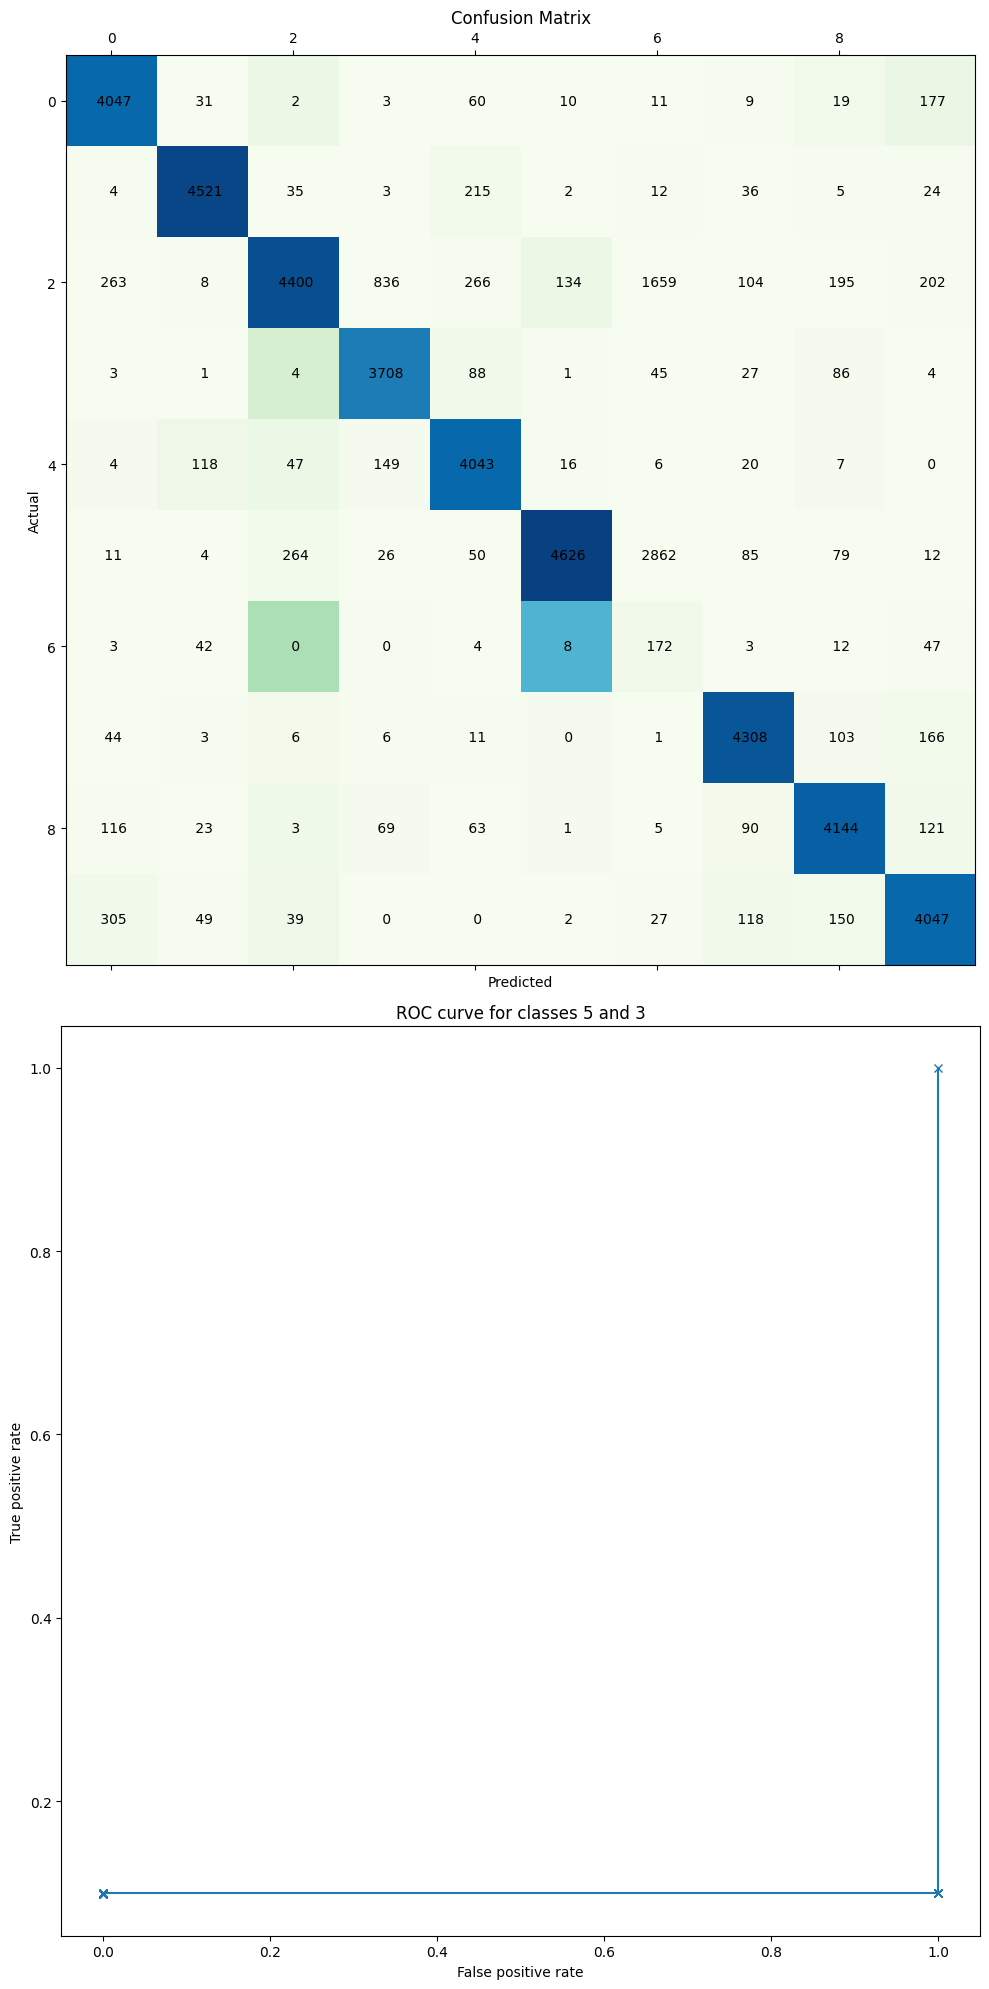

In [60]:
logisticRegressor(p5["splitData"][0])

### Test split -- 30:70

Stopping criterion met
Test accuracy: 0.7269523809523809
Training empirical risk: 3.4816714991638884
Training error rate: 0.2717222222222222
Test empirical risk: 3.3856956372979026
Test error rate: 0.2730476190476191
Class-wise F1 score:
[0.91054739 0.94137037 0.77202328 0.89113549 0.8935236  0.68490077
 0.01415848 0.91963328 0.90800681 0.89968423]


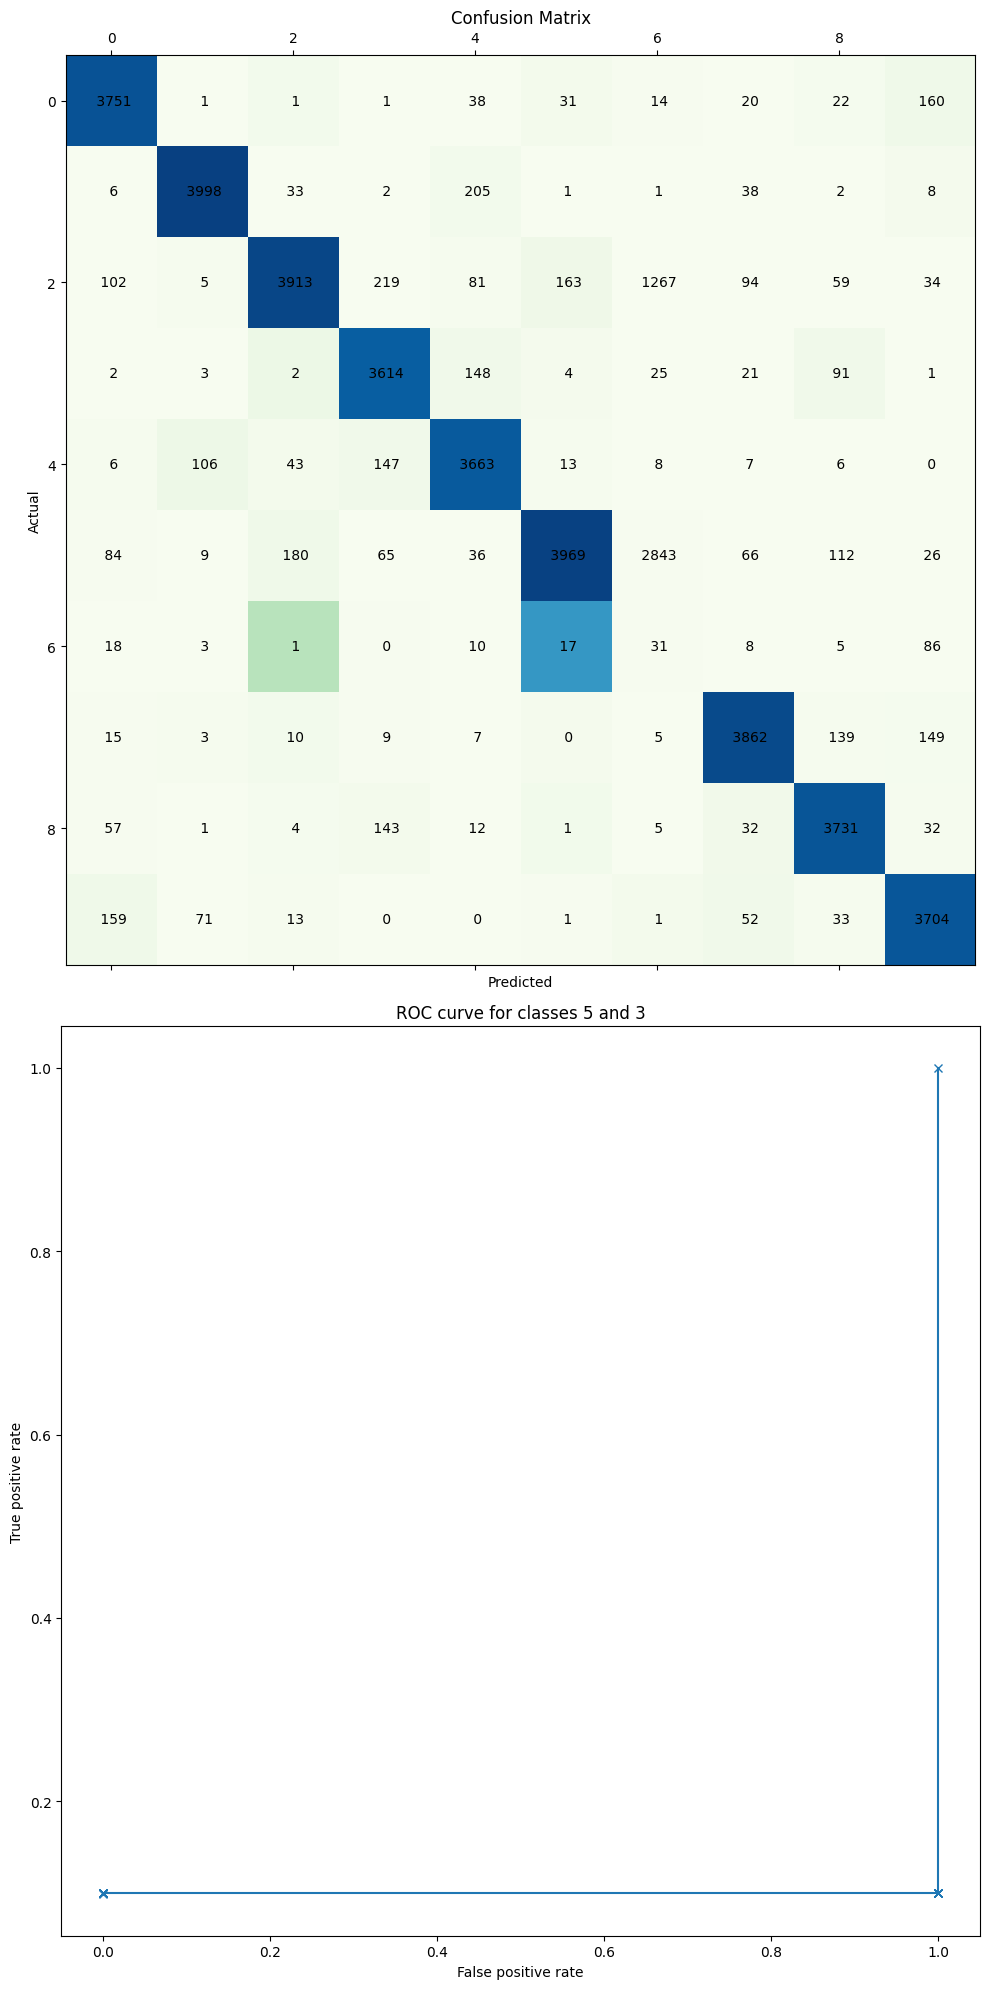

In [61]:
logisticRegressor(p5["splitData"][1])

### Test split -- 50:50

Stopping criterion met
Test accuracy: 0.7371
Training empirical risk: 3.5892908508491597
Training error rate: 0.2757333333333334
Test empirical risk: 3.3355307093481734
Test error rate: 0.2629
Class-wise F1 score:
[0.86542847 0.92652719 0.84336627 0.91034251 0.87389343 0.69327631
 0.11158022 0.9345228  0.90806945 0.8500962 ]


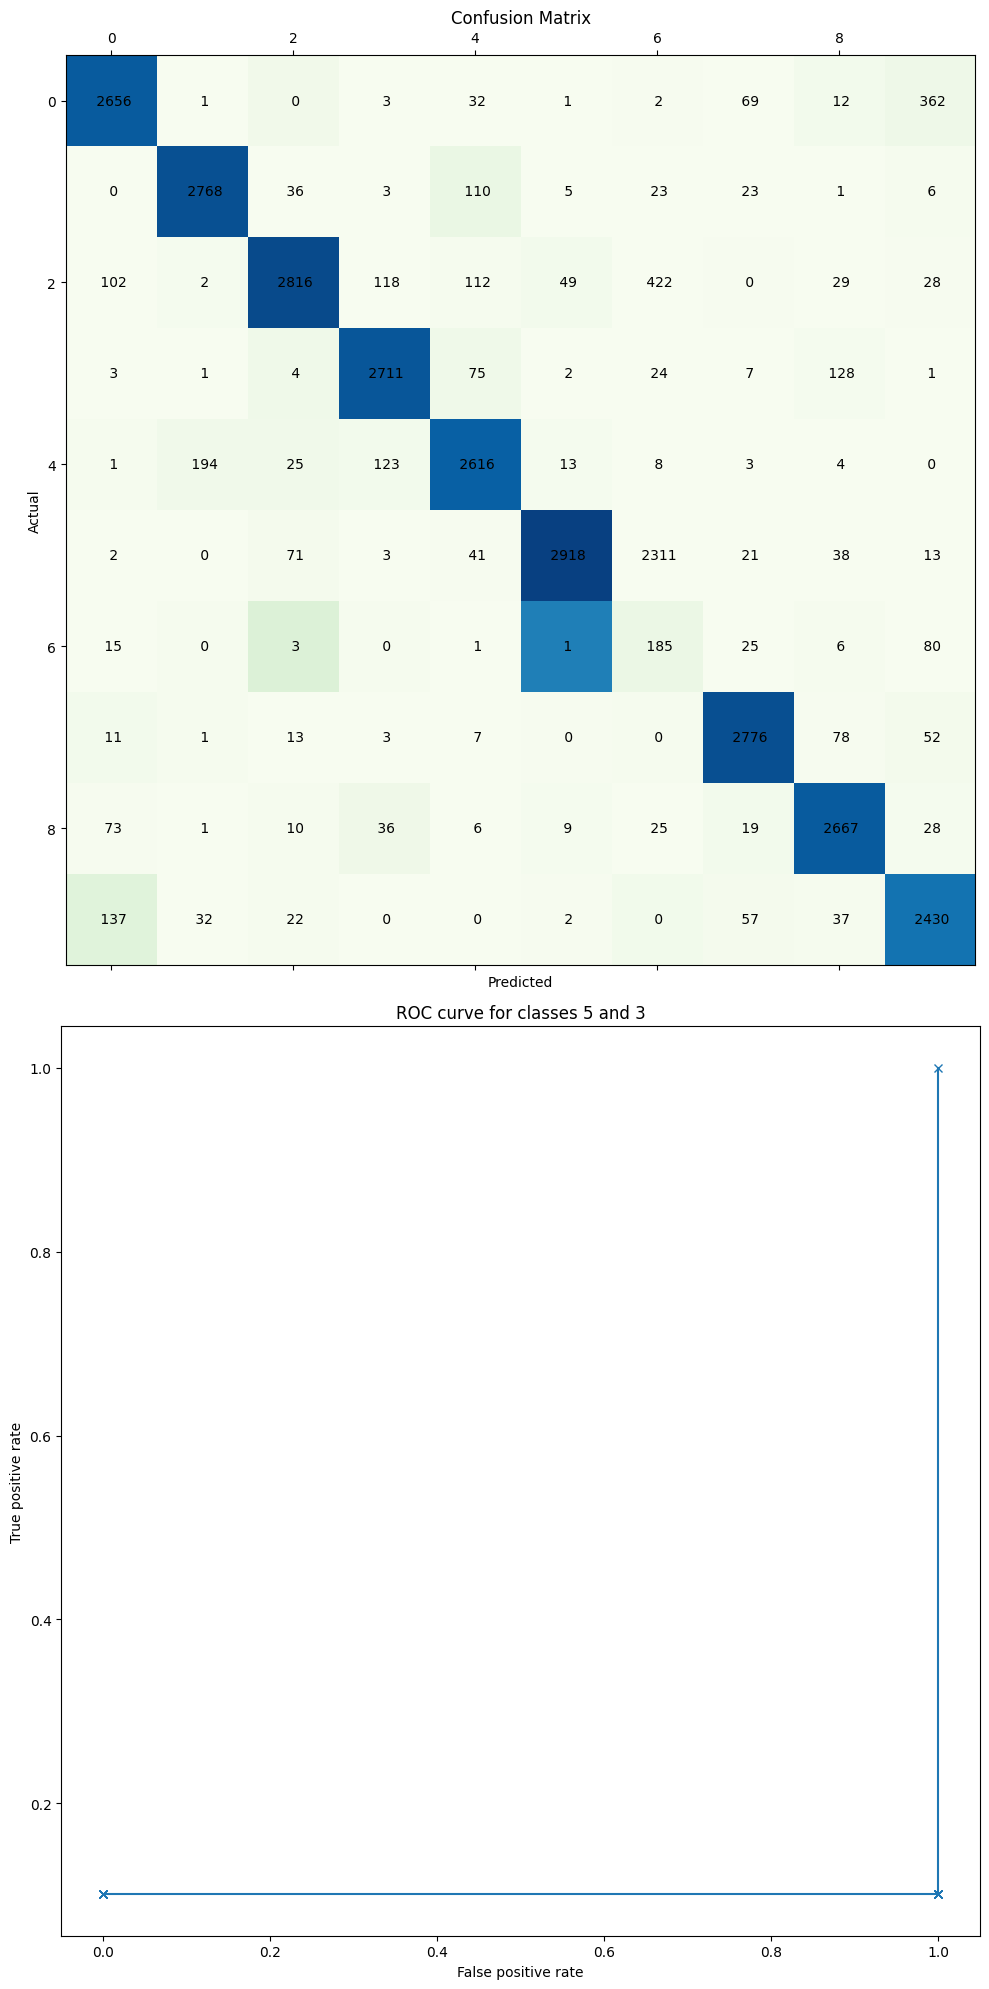

In [62]:
logisticRegressor(p5["splitData"][2])

### Test split -- 70:30

Stopping criterion met
Test accuracy: 0.7467222222222222
Training empirical risk: 3.448451090380742
Training error rate: 0.27121428571428574
Test empirical risk: 3.016581307380229
Test error rate: 0.2532777777777778
Class-wise F1 score:
[0.90472053 0.92222222 0.84972812 0.95797383 0.89701744 0.69712015
 0.09552539 0.93242506 0.93575338 0.89217052]


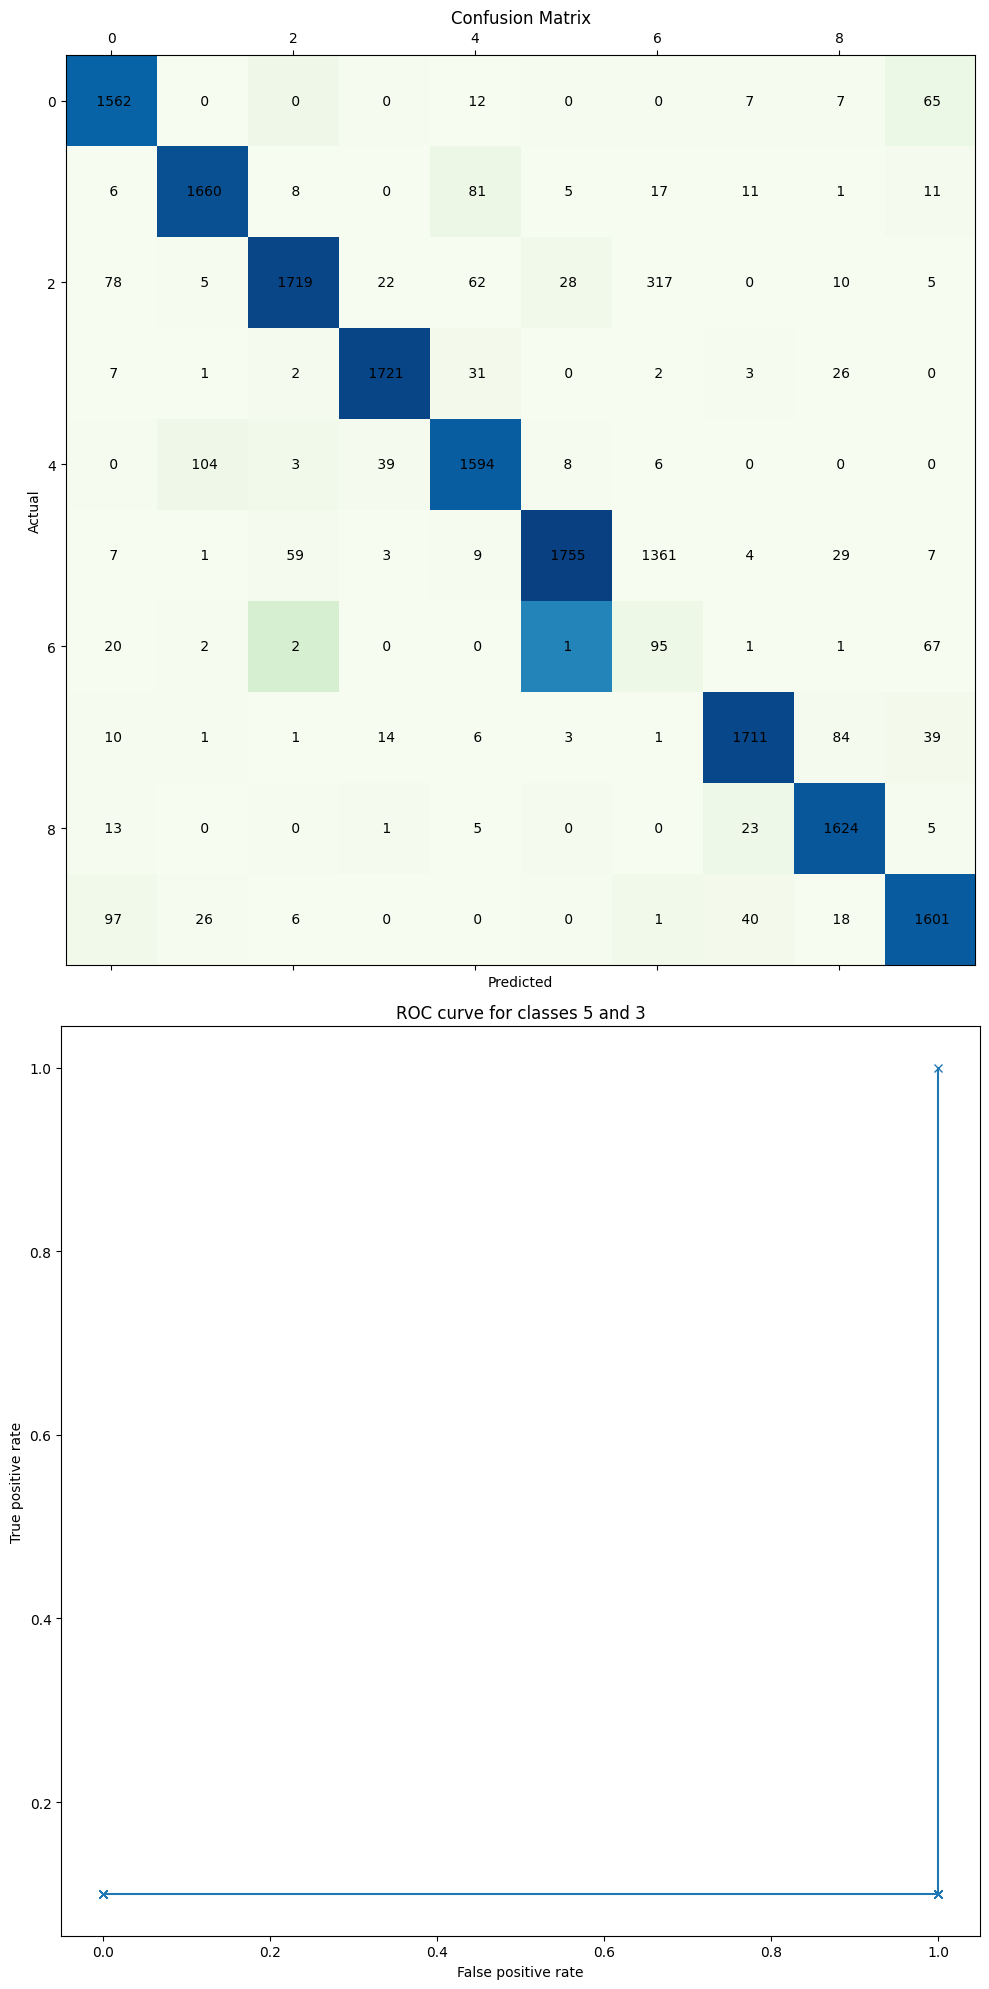

In [63]:
logisticRegressor(p5["splitData"][3])

### Test split -- 90:10

Stopping criterion met
Test accuracy: 0.7348333333333333
Training empirical risk: 3.4550232045496148
Training error rate: 0.27281481481481484
Test empirical risk: 3.0791253451211507
Test error rate: 0.26516666666666666
Class-wise F1 score:
[0.89263531 0.90865766 0.78721957 0.94449188 0.87624209 0.7263743
 0.00326264 0.95008319 0.93378038 0.94184168]


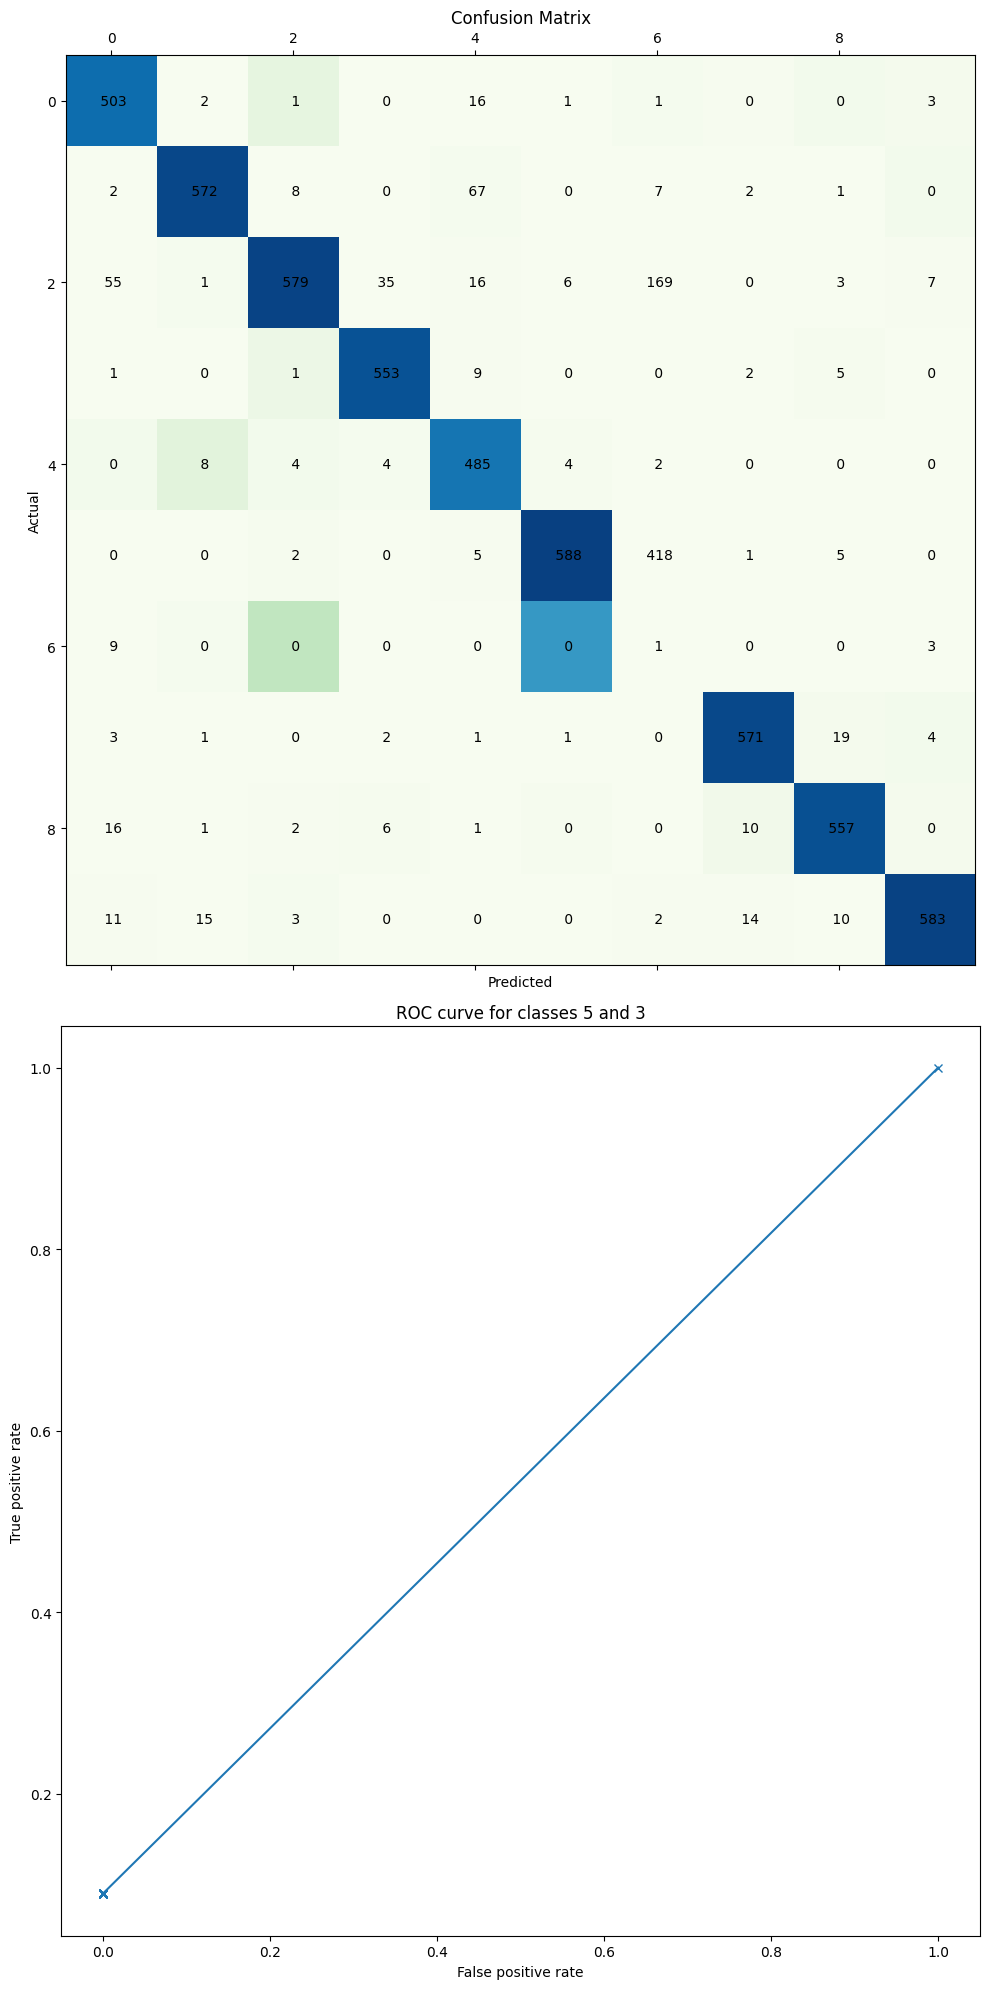

In [64]:
logisticRegressor(p5["splitData"][4])